In [1]:
import os
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc , logfbank
import librosa as lr
import pickle
import librosa
from scipy import signal
get_ipython().magic('matplotlib inline')
#%matplotlib nbagg
import soundfile
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
#Loading the required RAVDESS DataSet with length of 1439 Audio Files 
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = './speech-emotion-recognition-ravdess-data'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)

1439

In [3]:
#Use the Speech-Recognition API to get the Raw Text from Audio Files, Though Speech Recognition
#is less strong for large chunk of files , so used Error Handling , where when it is not be able to 
#produce the text of a particular Audio File it prints the statement 'error'.Just for understanding Audio
import speech_recognition as sr
r=sr.Recognizer()
for file in range(0 , len(listOfFiles) , 200):
    with sr.AudioFile(listOfFiles[file]) as source:
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')

is it talking by the door
talking by the door
error
talking by the door
talking by the door
error
talking by the door
talking


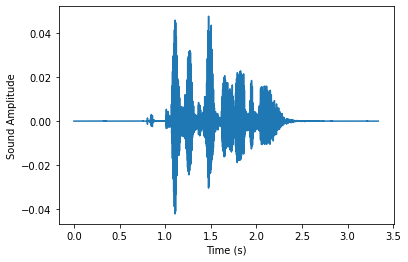

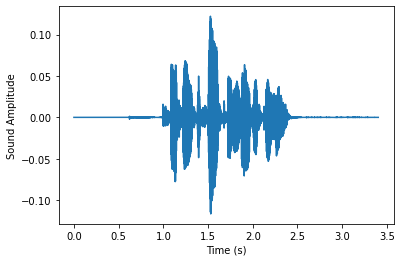

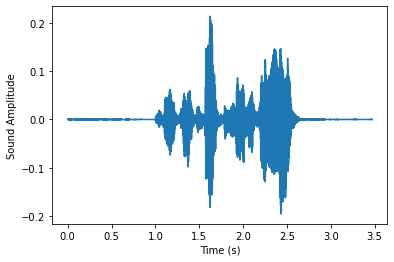

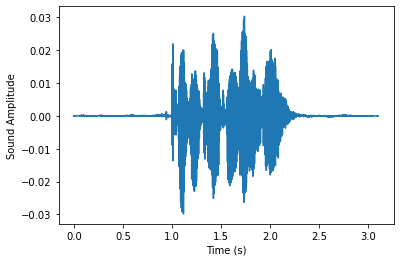

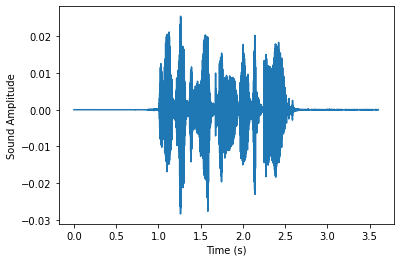

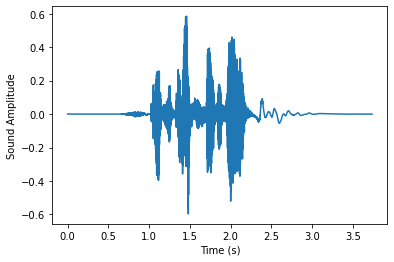

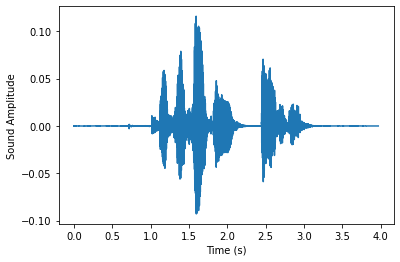

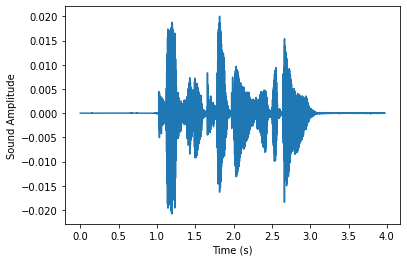

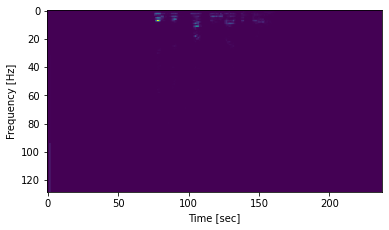

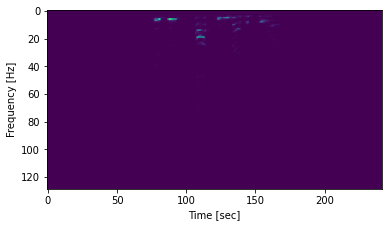

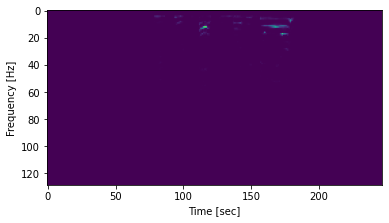

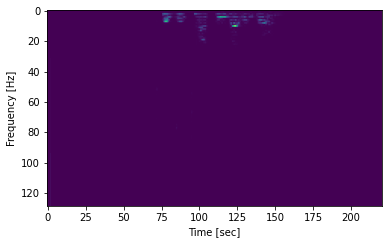

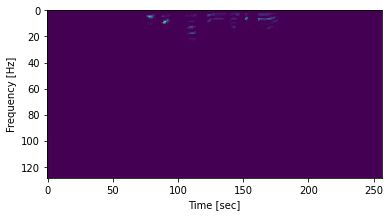

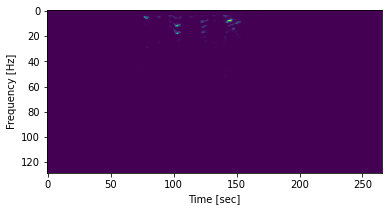

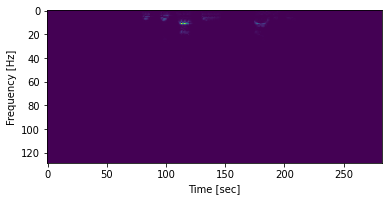

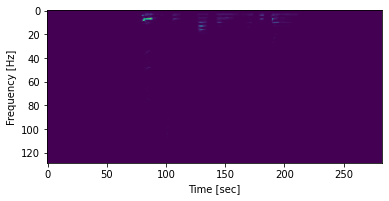

In [4]:
#Plotting the Basic Graphs for understanding of Audio Files :
for file in range(0 , len(listOfFiles) , 200):
    audio , sfreq = lr.load(listOfFiles[file])
    time = np.arange(0 , len(audio)) / sfreq
    
    fig ,ax = plt.subplots()
    ax.plot(time , audio)
    ax.set(xlabel = 'Time (s)' , ylabel = 'Sound Amplitude')
    plt.show()
    
#PLOT THE SEPCTOGRAM
for file in range(0 , len(listOfFiles) , 200):
     sample_rate , samples = wavfile.read(listOfFiles[file])
     frequencies , times, spectrogram = signal.spectrogram(samples, sample_rate) 
     plt.pcolormesh(times, frequencies, spectrogram, shading='auto')
     plt.imshow(spectrogram)
     plt.ylabel('Frequency [Hz]')
     plt.xlabel('Time [sec]')
     plt.show()

In [20]:
#Next Step is In-Depth Visualisation of Audio Files and its certain features to plot for.
#They are the Plotting Functions to be called later. 
def plot_signals(signals):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Time Series' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def plot_fft(fft):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transform' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y,freq = data[0] , data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq , Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
    
def plot_fbank(fbank):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
            
def plot_mfccs(mfccs):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Capstrum Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                             cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def calc_fft(y,rate):
    n = len(y)
    freq = np.fft.rfftfreq(n , d= 1/rate)
    Y= abs(np.fft.rfft(y)/n)
    return(Y,freq)

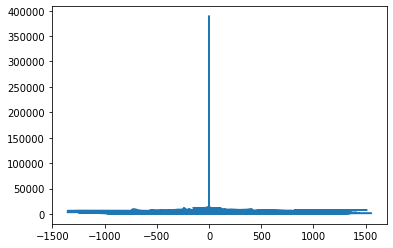

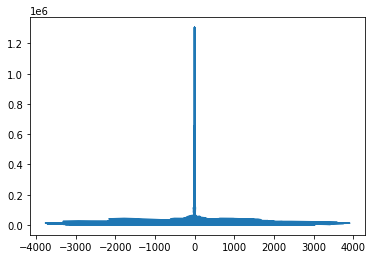

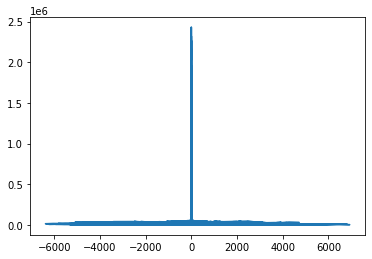

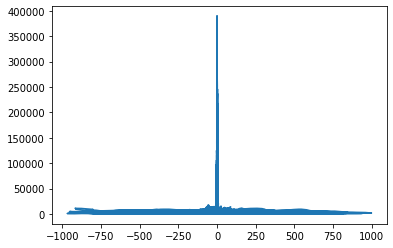

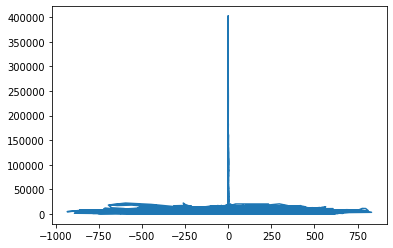

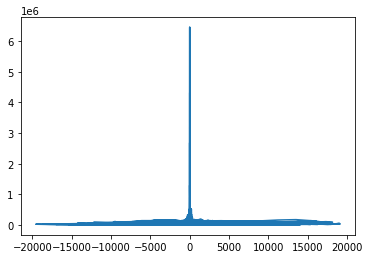

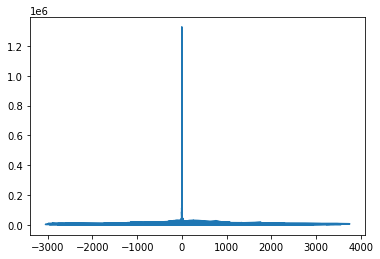

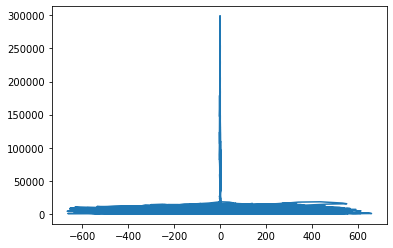

IndexError: list index out of range

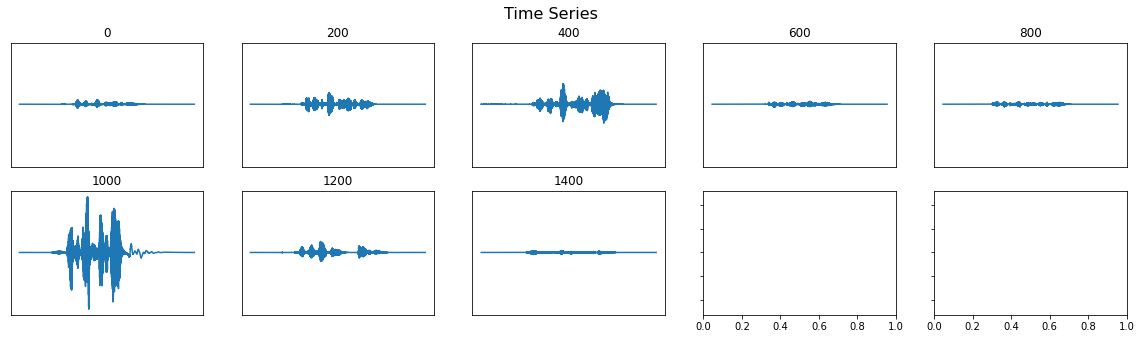

In [11]:
# Here The Data Set is loaded and plots are Visualised by Calling the Plotting Functions . 
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
for file in range(0 , len(listOfFiles)-1 , 200):
    rate, data = wav.read(listOfFiles[file])
    fft_out = fft(data)
    %matplotlib inline
    plt.plot(data, np.abs(fft_out))
    plt.show()
    
signals={}
fft={}
fbank={}
mfccs={}
# load data
for file in range(0 , len(listOfFiles)-1 , 200):
     rate, data = wavfile.read(listOfFiles[file])
     signal,rate =librosa.load(listOfFiles[file] , sr=44100)
     mask = envelope(signal , rate , 0.0005)
     signals[file] = signal
     fft[file] = calc_fft(signal , rate)
    
     bank = logfbank(signal[:rate] , rate , nfilt = 26, nfft = 1103).T
     fbank[file] = bank
     mel = mfcc(signal[:rate] , rate , numcep =13 , nfilt = 26 , nfft=1103).T
     mfccs[file]=mel

plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

In [5]:
#Now Cleaning Step is Performed where:
#DOWN SAMPLING OF AUDIO FILES IS DONE  AND PUT MASK OVER IT AND DIRECT INTO CLEAN FOLDER
#MASK IS TO REMOVE UNNECESSARY EMPTY VOICES AROUND THE MAIN AUDIO VOICE 
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [4]:
#The clean Audio Files are redirected to Clean Audio Folder Directory 
import glob,pickle
for file in tqdm(glob.glob(r'D:\Documents\ml\Speech_Emotion_Detection\Speech_Emotion_Detection\speech-emotion-recognition-ravdess-data\\**\\*.wav')):
    file_name = os.path.basename(file)
    signal , rate = librosa.load(file, sr=16000)
    mask = envelope(signal,rate, 0.0005)
    wavfile.write(filename= r'D:\Documents\ml\Speech_Emotion_Detection\Speech_Emotion_Detection\cleaned_audio\\'+str(file_name), rate=rate,data=signal[mask])

100%|██████████████████████████████████████████████████████████████████████████████| 1439/1439 [00:32<00:00, 44.93it/s]


In [22]:
#Feature Extraction of Audio Files Function 
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
        #print(f"{mfccs}\n")
        #print(f"{chroma}\n")
        #print(f"{mel}\n")
    return result

In [23]:
#Emotions in the RAVDESS dataset to be classified Audio Files based on . 
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#These are the emotions User wants to observe more :
observed_emotions=['neutral', 'calm', 'happy', 'angry']

In [25]:
#Load the data and extract features for each sound file
from glob import glob
import os
import glob
def load_data(test_size):
    x,y=[],[]
    for file in glob.glob("D:\Documents\ml\Speech_Emotion_Detection\Speech_Emotion_Detection\cleaned_audio\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        print(feature)
        print(emotion)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [26]:
#Splitting the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)
print((x_train.shape[0], x_test.shape[0]))
print(f'Features extracted: {x_train.shape[1]}')
#print(x_train[0])
#print(y_train[0])

[-4.27807678e+02  8.26337128e+01 -3.08344612e+01  9.42214775e+00
 -2.70548077e+01 -8.30477810e+00 -2.82324562e+01 -1.32314138e+01
 -8.65959072e+00 -6.21879816e+00 -1.12556696e+01 -6.49284458e+00
 -6.62938404e+00 -1.18973846e+01 -5.41431618e+00 -5.07235479e+00
 -3.59464288e+00  5.67124486e-01 -3.51273894e-01  3.42924774e-01
 -1.88721061e+00  4.13482857e+00 -5.58419800e+00 -1.40827358e+00
 -1.69993186e+00  2.29433107e+00  3.69533396e+00  1.29757929e+00
  5.27062559e+00  7.19449186e+00  7.98556566e+00  6.67765236e+00
  9.09846008e-01 -1.60400653e+00  2.09358037e-01 -1.23892796e+00
 -1.17934465e+00 -1.62587690e+00 -1.02618539e+00 -5.87960768e+00
  4.57366765e-01  4.43474323e-01  5.19326925e-01  5.43604076e-01
  5.12712419e-01  5.43524384e-01  6.26759410e-01  6.66539490e-01
  6.10015035e-01  5.44002175e-01  5.13204873e-01  4.63806450e-01
  1.61646858e-05  9.56451549e-05  1.97424626e-04  2.62115413e-04
  7.64542201e-05  1.84076402e-04  4.70476877e-03  3.30228060e-02
  1.78086355e-01  3.14390

[-3.77383209e+02  7.90613632e+01 -2.12657871e+01  2.35276079e+00
 -7.70128489e+00 -2.20144863e+01 -2.56639614e+01 -1.77532845e+01
 -8.77666187e+00 -1.99313297e+01 -1.12295408e+01 -8.75644684e+00
 -1.43756723e+01 -4.80892372e+00 -5.69256687e+00 -1.25753288e+01
 -2.49604416e+00 -8.99315071e+00 -9.06608772e+00 -3.79820800e+00
 -5.10001707e+00  2.39198372e-01 -6.81374073e-01  6.16587925e+00
  4.45059252e+00  1.39248667e+01  1.71854675e+00  9.77795410e+00
  3.14497209e+00  1.28107920e+01  5.45460987e+00  1.18423462e+01
 -5.72201371e-01  4.87902784e+00 -1.61951053e+00  5.44454861e+00
  1.28766763e+00 -1.99408126e+00 -5.14800119e+00 -2.73080850e+00
  4.69500959e-01  3.68234247e-01  3.86909872e-01  3.77412170e-01
  3.63164753e-01  3.62505347e-01  3.96750063e-01  4.45389956e-01
  4.95032609e-01  4.69427615e-01  5.01878560e-01  5.34460187e-01
  3.54256699e-05  1.57887902e-04  2.48553872e-04  1.57724877e-04
  1.22838072e-04  7.90371094e-04  5.01125380e-02  3.20371836e-01
  1.38447928e+00  2.94638

[-5.39233521e+02  1.10551300e+02 -8.19485843e-01  2.23667755e+01
 -1.69447689e+01 -3.67057920e+00 -2.80768490e+01 -2.51960621e+01
 -7.39795113e+00 -2.61829185e+00 -1.54053221e+01 -9.01708603e+00
  3.73536181e+00 -1.24995680e+01 -1.36492491e+01 -6.59860229e+00
 -5.35993338e+00 -1.33981133e+01 -7.66528368e+00 -4.54490328e+00
 -1.36201372e+01 -4.19852018e+00 -7.10223198e+00 -9.77101135e+00
 -4.52172089e+00 -4.57164049e+00 -5.60225248e+00 -3.50836301e+00
 -5.42581034e+00 -5.96275091e+00 -4.18359804e+00 -2.91031212e-01
  4.50890636e+00  1.38833113e+01  2.09547176e+01  2.43024445e+01
  1.72401600e+01  1.13295746e+01 -9.67697442e-01 -3.18837047e+00
  4.63112950e-01  3.79336596e-01  2.48999998e-01  2.64216989e-01
  4.12084341e-01  8.70600402e-01  7.02655613e-01  4.50237989e-01
  3.39472204e-01  3.53261560e-01  3.01226348e-01  2.98760176e-01
  5.09762549e-06  2.54412862e-05  9.23558473e-05  1.10004301e-04
  6.30452196e-05  1.59776164e-03  1.22301787e-01  1.08812034e-01
  1.05076125e-02  2.42322

[-4.32361298e+02  7.76763687e+01 -3.15996838e+01  1.33740683e+01
 -2.88484573e+01 -8.88163090e+00 -2.69914169e+01 -9.23087978e+00
 -1.09594202e+01 -3.82190442e+00 -1.11141100e+01 -8.54901886e+00
 -6.26767635e+00 -1.23731680e+01 -7.07695580e+00 -2.55236983e+00
 -4.91542530e+00 -7.68941581e-01 -1.86351120e+00 -2.24588633e+00
 -4.19563818e+00  1.65895009e+00 -5.56791258e+00 -5.01959658e+00
 -5.38418913e+00  3.02730346e+00  4.94259119e+00  1.84140980e+00
  6.32421827e+00  9.52391148e+00  6.10420799e+00  6.04539251e+00
  4.01374578e+00  9.37559009e-01  2.40872860e+00 -1.92641556e+00
 -1.06967819e+00 -9.65704620e-01  6.16893709e-01 -2.52175379e+00
  4.26255703e-01  4.57766891e-01  4.61590588e-01  5.19267380e-01
  5.24557829e-01  5.35702348e-01  5.35527229e-01  6.56356394e-01
  6.41266286e-01  5.63763618e-01  5.20029306e-01  4.91351306e-01
  1.84589899e-05  4.36465707e-05  1.73418754e-04  2.81285902e-04
  1.91108542e-04  2.72417499e-04  4.93878219e-03  3.66301164e-02
  1.58422172e-01  1.83400

[-4.65402679e+02  1.06816383e+02  1.61038170e+01  1.77269974e+01
 -5.22635317e+00  2.41773993e-01 -8.53270340e+00 -1.66777172e+01
 -1.26287642e+01 -1.37836576e+00 -9.27538490e+00 -1.02552433e+01
 -5.35932159e+00 -1.40312791e+00 -3.34577060e+00 -4.66669559e+00
 -7.03928232e+00 -3.90655899e+00 -1.22167072e+01 -3.92678142e+00
 -5.80444455e-01 -6.80145741e+00 -5.09409094e+00 -3.55049896e+00
 -5.51294565e+00 -8.72896492e-01 -6.07937860e+00  1.33408713e+00
 -3.82919931e+00  2.22796655e+00 -1.66840267e+00 -2.87493277e+00
 -4.17181492e+00 -5.07398796e+00 -6.75309086e+00 -6.11570120e+00
 -4.30629969e+00 -2.70240164e+00 -5.72736645e+00 -4.59208202e+00
  6.41660988e-01  5.90652347e-01  5.65063298e-01  5.50276756e-01
  4.74159896e-01  4.31300253e-01  4.39668268e-01  5.76771259e-01
  6.31305337e-01  6.03727162e-01  5.44156373e-01  6.02684200e-01
  2.27876197e-04  8.17387918e-05  4.67674166e-04  9.73738544e-03
  8.89259130e-02  1.36339396e-01  1.58944335e-02  8.85715056e-03
  2.45852657e-02  1.20712

[-4.96283386e+02  1.17205597e+02  8.20169353e+00  2.49691639e+01
 -5.79728365e+00 -1.07928979e+00 -1.75788078e+01 -2.44076290e+01
 -1.65606918e+01 -1.78842545e+00 -1.55210905e+01  7.05731249e+00
 -1.48601532e+01 -4.72729540e+00  1.09021112e-01 -1.24607849e+01
 -4.17412281e-01  4.44115877e+00 -1.22047939e+01 -2.84413695e+00
 -8.12179184e+00 -7.69328499e+00 -2.69490910e+00 -2.47285056e+00
 -1.09145057e+00  1.11224139e+00 -2.50635362e+00  3.97519970e+00
 -6.01408339e+00 -9.93891180e-01  1.51812756e+00  1.12795025e-01
  3.97005957e-03 -3.43246818e+00 -1.30101585e+00 -1.72068703e+00
  2.60347748e+00  2.21228320e-02 -1.70753109e+00 -9.27481234e-01
  5.05797744e-01  4.48138922e-01  4.96097296e-01  5.00387132e-01
  4.90844458e-01  4.33301151e-01  4.60566819e-01  4.71023858e-01
  4.80982214e-01  6.18767917e-01  5.17679036e-01  4.74035263e-01
  2.78721040e-04  1.00447396e-04  1.35512804e-04  7.49765290e-03
  2.47407984e-02  2.39113253e-02  1.61804575e-02  9.87485796e-03
  4.61786725e-02  4.64507

[-4.01832825e+02  8.40929642e+01 -1.17810793e+01  1.71713581e+01
 -3.25268698e+00 -2.07520199e+01 -2.96436234e+01 -8.44232082e+00
 -2.67352753e+01  1.00256276e+00 -1.31214504e+01 -5.96889734e+00
 -5.62720203e+00 -9.37855530e+00 -5.71298742e+00 -1.03214054e+01
 -4.83184719e+00 -6.67949820e+00 -1.33819847e+01 -7.21093273e+00
 -7.18686581e+00 -1.23271112e+01 -5.80486155e+00 -2.50738907e+00
 -8.72654057e+00 -8.12062085e-01 -5.78350782e+00 -2.39461255e+00
 -7.63398170e+00 -5.63063478e+00 -3.71775031e+00 -3.34524632e+00
 -7.45792961e+00 -6.58087587e+00 -8.25366879e+00  5.54885030e-01
  2.18260670e+00  2.08622003e+00 -3.27534342e+00 -2.38840675e+00
  5.17014980e-01  5.97727478e-01  6.25394762e-01  5.88236690e-01
  6.11585259e-01  5.92560351e-01  4.94170457e-01  5.08982539e-01
  6.38520241e-01  6.15036249e-01  5.80370724e-01  5.33239365e-01
  6.18040576e-06  1.28096668e-04  1.09069003e-03  5.91374654e-03
  1.48660829e-02  1.18739866e-01  1.82814732e-01  3.88191752e-02
  1.63798090e-02  1.44921

[-4.65165619e+02  7.56024246e+01 -1.46772146e+01  8.38534164e+00
 -1.14562387e+01 -1.25629330e+01 -2.53352280e+01 -2.81045933e+01
 -4.28084993e+00 -1.31561632e+01 -9.36361694e+00 -1.84403038e+01
 -6.40436983e+00 -5.91685343e+00 -2.23526287e+01 -2.94938660e+00
 -7.59118748e+00 -1.22801609e+01 -7.17574406e+00 -8.16354084e+00
 -1.05456877e+01 -5.48322296e+00 -3.96589661e+00 -2.68152690e+00
 -4.44116205e-01  1.79805905e-01  5.76025152e+00  1.02293863e+01
  1.06630983e+01  1.21697512e+01  6.83148527e+00  5.36953068e+00
  3.53397751e+00  1.24162636e+01  1.66750870e+01  8.84913826e+00
  4.33584213e+00 -1.75900590e+00  1.36894310e+00  4.82377577e+00
  3.56160015e-01  3.57961029e-01  2.77468443e-01  3.09009224e-01
  4.74288642e-01  5.62776029e-01  5.86389601e-01  5.39648652e-01
  5.26067078e-01  6.02691174e-01  4.80624139e-01  3.85766476e-01
  7.90498234e-06  1.71595948e-05  2.05719807e-05  9.72443104e-06
  5.23674316e-06  3.51537368e-03  1.15323208e-01  1.75683200e-01
  2.81741619e-01  1.25171

[-3.99438599e+02  1.21278824e+02 -6.42003536e+00  2.83762112e+01
 -6.90380955e+00 -3.54720116e+00 -9.03036404e+00 -2.67839012e+01
 -1.14928350e+01  4.88545150e-01 -1.15594339e+01 -5.68382359e+00
 -1.65023375e+00 -5.54213142e+00 -5.08895540e+00 -1.02236331e+00
 -2.33431745e+00 -4.18804836e+00 -9.90558720e+00 -1.32062399e+00
 -8.63171768e+00 -1.05519953e+01 -4.40356112e+00 -4.90750933e+00
 -8.09174728e+00 -1.86901236e+00 -1.39999223e+00 -1.91273093e+00
 -6.63055325e+00 -4.43241596e+00 -3.86406922e+00 -8.50583911e-01
 -4.00863457e+00 -6.04614639e+00 -5.65455341e+00 -6.03537226e+00
 -3.31544995e+00 -2.83135724e+00 -3.36920834e+00 -5.75440741e+00
  4.26804721e-01  5.50917506e-01  5.70775092e-01  5.23873448e-01
  5.59997559e-01  6.30483508e-01  7.03587413e-01  7.08044410e-01
  5.80085158e-01  5.04325628e-01  5.59685111e-01  4.41238344e-01
  5.63182475e-05  1.50577500e-04  4.22793850e-02  3.13217133e-01
  8.07143748e-02  8.14374443e-03  6.60111234e-02  2.27632150e-01
  1.88792154e-01  2.57094

[-4.90958160e+02  6.67862778e+01 -3.54902306e+01  9.31815624e+00
 -2.66766968e+01 -2.79217224e+01 -3.12806396e+01 -2.22094326e+01
 -5.97864771e+00 -1.51176300e+01 -7.08472586e+00 -1.41001005e+01
 -1.16323891e+01 -7.18927717e+00 -8.72875786e+00 -6.12422895e+00
 -8.91062450e+00 -1.14969406e+01 -4.08792353e+00 -3.00292778e+00
 -6.99415827e+00 -6.09527528e-01 -2.91730881e+00  5.48519850e+00
  1.18036766e+01  1.79322453e+01  1.62591572e+01  1.14369707e+01
  8.07708073e+00  1.49342775e+01  1.49552183e+01  1.55278502e+01
  1.10213928e+01  7.62926149e+00  1.34140718e+00  6.57883120e+00
  5.55330801e+00  5.75456858e+00  4.77532595e-01 -2.73765087e+00
  4.31572050e-01  3.39296490e-01  3.64891976e-01  4.43718344e-01
  3.49977225e-01  4.53516841e-01  4.80224520e-01  4.75580364e-01
  5.18370569e-01  4.99128580e-01  6.52151108e-01  5.63020170e-01
  3.41998093e-05  1.03171215e-05  6.33202148e-07  3.08620884e-07
  8.58894055e-07  1.00886631e-04  1.88451447e-03  6.98219379e-03
  3.96676101e-02  9.72540

[-5.05955078e+02  7.47932510e+01 -2.29791012e-02 -2.64110994e+00
 -2.99334278e+01 -9.55454826e+00 -3.28705330e+01 -1.18056993e+01
 -1.42966299e+01 -6.22743750e+00 -1.39424505e+01 -5.82048559e+00
 -1.20618544e+01 -1.05312929e+01 -8.16736507e+00 -7.63041639e+00
 -1.14833555e+01  1.99955904e+00 -7.35187232e-01  8.09808254e-01
  3.35600853e+00  1.48489702e+00 -5.02994013e+00  6.94232416e+00
  3.80633616e+00  5.98510504e+00  1.69162571e+00  2.78862858e+00
  6.85544395e+00  8.69659233e+00  5.68802643e+00  7.04647243e-01
 -5.69961357e+00 -1.77653885e+00  8.41169357e-01  4.08686590e+00
  1.58854067e+00  1.27990294e+00 -4.28084898e+00 -3.16118121e+00
  4.38716888e-01  3.65715742e-01  4.29456621e-01  5.29077709e-01
  5.75367868e-01  4.24341053e-01  4.34575945e-01  4.88474935e-01
  5.52247345e-01  4.81281281e-01  4.68301803e-01  5.05930901e-01
  1.03110608e-06  2.32725670e-05  3.26462286e-05  1.22456140e-05
  5.44969589e-06  5.35021500e-05  1.96551811e-03  2.76376237e-03
  2.57376526e-02  3.20897

[-4.87725464e+02  6.87340698e+01 -1.57314432e+00  3.49614573e+00
 -5.66588116e+00 -1.45461416e+01 -1.85403042e+01 -2.74673786e+01
 -1.18204060e+01 -6.04939079e+00 -1.64112206e+01 -7.46082449e+00
 -7.99494791e+00 -5.75764370e+00 -1.42808428e+01 -2.83637885e-02
 -1.29541750e+01 -7.59236479e+00 -1.08791943e+01 -8.02043819e+00
 -1.00124435e+01 -4.88953209e+00 -7.21390915e+00 -5.15321255e+00
 -3.49233460e+00  3.98671746e+00  3.42262697e+00  7.73274517e+00
  1.49247897e+00  4.77942610e+00  9.09541130e+00  1.12396116e+01
  8.54050922e+00  8.18191433e+00  1.37872137e-02  3.56908083e+00
  6.99992466e+00  1.10497971e+01  6.09463072e+00  1.84273934e+00
  2.90677100e-01  3.21622521e-01  3.75651747e-01  4.23444867e-01
  4.99623507e-01  5.23958027e-01  5.33694565e-01  6.50463045e-01
  5.48177004e-01  4.87786353e-01  4.91996139e-01  3.87151480e-01
  1.19172219e-05  1.85914396e-05  3.55523043e-05  2.46427080e-05
  1.72626551e-05  2.52688699e-03  4.15011160e-02  6.68004602e-02
  1.20502099e-01  8.63776

[-5.76970520e+02  5.74860573e+01 -2.48469567e+00  1.09519644e+01
 -1.62607384e+01 -2.60704632e+01 -2.13672161e+01 -8.58693218e+00
 -8.07365799e+00 -6.81243753e+00 -1.52998171e+01 -1.06700106e+01
 -8.74707317e+00 -4.26939869e+00 -1.05254040e+01 -1.18450480e+01
 -4.18758678e+00 -1.51536818e+01 -4.51251936e+00 -6.84499741e+00
 -9.55994225e+00 -3.05128622e+00 -6.71590900e+00 -4.59148347e-01
  2.15676999e+00  6.85490942e+00  6.18466949e+00  5.11134291e+00
  6.70832586e+00  1.14998112e+01  1.47982426e+01  1.65560226e+01
  1.38311377e+01  1.16999254e+01  8.56573296e+00  1.09871292e+01
  5.59607029e+00  4.56443220e-01 -2.85501432e+00  1.87860072e-01
  4.16890889e-01  3.37111861e-01  3.58284891e-01  3.77869338e-01
  3.94420862e-01  4.89765435e-01  6.54217303e-01  6.83829129e-01
  5.96658885e-01  5.09634316e-01  5.49545646e-01  5.61730921e-01
  1.02947706e-05  2.96902931e-06  1.03462594e-06  1.14595821e-06
  1.42141266e-06  3.80879574e-05  1.40647474e-03  1.02432817e-02
  1.19965523e-02  2.61936

[-4.58758392e+02  1.18447083e+02 -8.84675217e+00  1.95394115e+01
 -4.92043734e+00 -6.76087284e+00 -7.33478737e+00 -7.03307676e+00
 -1.22395344e+01 -3.65373945e+00 -2.17282724e+00 -8.04095554e+00
 -2.09546757e+00 -3.59137297e+00 -3.04567099e+00 -8.42758656e+00
 -2.21269298e+00 -1.70842505e+00 -8.51371002e+00 -3.76523376e-01
 -9.16251087e+00 -3.25220633e+00 -7.17945051e+00 -1.56922781e+00
 -5.14643812e+00  1.43901312e+00 -2.88353348e+00  1.41093457e+00
 -3.34343767e+00 -9.19290960e-01 -4.90577936e+00 -7.55201757e-01
 -1.39104402e+00 -3.83883297e-01 -2.69393778e+00 -1.91080666e+00
 -2.68138027e+00  1.46921253e+00  3.02160549e+00  2.43979502e+00
  5.81400335e-01  5.41061044e-01  5.71351111e-01  6.76648915e-01
  6.56872690e-01  5.29314756e-01  5.42190909e-01  6.07075274e-01
  6.43336952e-01  6.56263292e-01  6.77077115e-01  5.46317995e-01
  1.46217179e-03  1.57282760e-04  2.72507779e-04  1.49510261e-02
  5.43403067e-02  9.21498537e-02  8.05212557e-02  1.05719930e-02
  3.77085842e-02  4.20248

[-5.45542908e+02  6.53535233e+01 -1.25757370e+01  3.44193721e+00
 -1.68317070e+01 -1.89620132e+01 -3.40969772e+01 -2.06991673e+01
 -1.71350002e+01 -1.55100555e+01 -1.02570295e+01 -1.69254284e+01
 -8.29475212e+00 -7.51848173e+00 -1.44274893e+01 -3.98814583e+00
 -9.94756222e+00 -5.62037516e+00 -3.42291880e+00  5.27595806e+00
  6.12005424e+00  4.54112816e+00 -1.69637132e+00 -3.11515474e+00
 -2.23161173e+00  1.96051371e+00  2.39663750e-01  1.69128931e+00
  5.89734745e+00  1.76195660e+01  1.75335445e+01  1.21154900e+01
  1.41924119e+00 -1.32618141e+00 -4.65119314e+00 -1.55682874e+00
 -5.33436012e+00 -8.70499194e-01 -4.84805137e-01 -2.84177375e+00
  3.30450267e-01  3.06738585e-01  4.65399981e-01  5.20480156e-01
  3.27099502e-01  2.72187710e-01  3.51332814e-01  6.27552211e-01
  6.18094802e-01  4.90847260e-01  3.70310813e-01  3.27090353e-01
  5.81546260e-07  1.91503523e-06  2.94621486e-06  8.67220479e-06
  2.49296340e-06  6.31893863e-06  3.26965346e-05  7.19230156e-03
  4.60275300e-02  2.02525

[-5.08698364e+02  1.19428673e+02 -1.00550280e+01  2.52321892e+01
 -1.77191448e+00 -1.20977764e+01 -2.23438396e+01 -1.72863376e+00
 -4.82449722e+00 -8.51678562e+00  7.09298402e-02  8.63110602e-01
 -1.23720293e+01  4.24156332e+00 -1.15298672e+01 -4.90334749e+00
 -7.08629861e-02 -6.73883486e+00 -7.88057327e+00 -5.77256012e+00
 -3.17192316e+00 -9.99527073e+00 -1.10239136e+00 -2.56376934e+00
 -2.68868828e+00 -5.72045231e+00 -5.71206760e+00 -4.87581682e+00
 -2.94932938e+00  1.90524888e+00 -2.39887881e+00 -5.28191710e+00
 -9.37433434e+00 -5.30011320e+00 -3.59000778e+00  2.37526506e-01
 -3.78923392e+00 -5.50930548e+00 -5.76559114e+00 -2.13800979e+00
  6.69347227e-01  5.54879248e-01  5.57732344e-01  6.11270010e-01
  6.37867570e-01  5.66062868e-01  5.93019366e-01  6.37299359e-01
  6.94134891e-01  6.91204071e-01  6.39060855e-01  6.90378368e-01
  3.97734548e-05  2.39627952e-05  5.31582953e-03  2.23995745e-02
  2.21068989e-02  2.75254133e-03  5.56289870e-03  4.46191337e-03
  1.15059894e-02  2.07906

[-4.85288635e+02  8.56762466e+01  1.06689000e+00  1.62944679e+01
 -1.74734020e+01 -2.68232269e+01 -1.47467890e+01 -8.05958939e+00
 -8.85411644e+00 -1.52674875e+01 -6.22150564e+00 -4.72344732e+00
 -8.17001724e+00 -7.13043785e+00 -1.17907295e+01 -3.35900807e+00
 -1.55982666e+01 -5.70732594e+00 -9.90157604e+00 -7.32151890e+00
 -8.42778206e+00 -2.68758583e+00 -4.15471840e+00  3.30733919e+00
  6.83863640e-01  9.62605357e-01 -2.54339695e-01  1.51429999e+00
  3.17083240e+00  5.02431154e+00 -1.61795154e-01  6.49717986e-04
 -3.77010345e-01  1.87167454e+00  3.30409908e+00  5.13540411e+00
  7.23761678e-01 -5.54505922e-02 -1.68129456e+00  1.50485194e+00
  5.61827183e-01  4.71000969e-01  4.48157638e-01  4.22149837e-01
  4.29630220e-01  4.29450691e-01  4.52133864e-01  4.10802305e-01
  5.23623109e-01  5.49802601e-01  4.75902766e-01  5.36542535e-01
  6.60743672e-06  2.95438640e-05  1.26213024e-04  1.21521516e-04
  1.44787700e-04  2.18187291e-02  5.47619797e-02  3.58190425e-02
  1.64218366e-01  1.27928

[-5.35849304e+02  7.55318680e+01 -1.01592073e+01  5.69860458e-01
 -2.02535801e+01 -1.49986038e+01 -2.56977386e+01 -2.15807800e+01
 -1.25628204e+01 -1.23922691e+01 -8.72327518e+00 -1.44741106e+01
 -5.93426275e+00 -8.21510983e+00 -1.33028297e+01 -5.46756887e+00
 -1.25385160e+01 -6.15823936e+00 -7.92096329e+00 -2.08902285e-01
  6.21815503e-01  5.57069349e+00  4.84791040e+00  1.57187331e+00
 -2.48557258e+00  3.68227363e+00  6.15425062e+00  1.20167732e+01
  1.34859533e+01  1.55437698e+01  1.09278345e+01  8.44227219e+00
  3.42682195e+00 -3.40451503e+00 -7.54415512e+00 -3.84342819e-01
 -1.79084861e+00 -3.03773236e+00 -6.86734962e+00 -4.51440191e+00
  3.53163868e-01  3.89058441e-01  4.37834471e-01  5.12297690e-01
  3.55163485e-01  3.40410948e-01  2.87093759e-01  3.36011916e-01
  5.82483888e-01  6.12853944e-01  5.82298100e-01  4.13455278e-01
  3.94078825e-06  3.04479613e-06  5.89574302e-06  5.77682067e-06
  4.18441095e-06  8.67073959e-06  2.35063872e-05  5.08762943e-03
  4.19161357e-02  5.25612

[-4.99015717e+02  7.69600296e+01  9.15487385e+00  1.93032799e+01
 -1.53368959e+01  3.52726293e+00 -2.68158112e+01 -1.83137341e+01
 -9.40945053e+00 -4.96142626e+00 -1.68617325e+01 -6.18791819e-01
 -9.81515884e+00 -9.11629486e+00 -1.14723692e+01 -3.65603375e+00
 -2.67121530e+00 -1.86034298e+00 -2.49476027e+00 -5.33776999e+00
 -1.89630187e+00  2.10816836e+00 -5.24074507e+00  9.48524952e-01
 -5.17009592e+00 -1.43318844e+00  4.07178736e+00  6.86947775e+00
  1.05236444e+01  1.26325684e+01  1.02182293e+01  1.22531137e+01
  1.11459770e+01  1.15541992e+01  8.69499969e+00  5.98681021e+00
  2.72512984e+00  5.29843664e+00  4.27404594e+00 -3.83164257e-01
  3.47515672e-01  4.27201897e-01  3.73714566e-01  3.87424827e-01
  5.22308290e-01  5.86982250e-01  6.09339416e-01  7.43475378e-01
  6.61256909e-01  6.17780626e-01  5.17307818e-01  3.94295126e-01
  1.34714865e-04  1.20774901e-04  4.62980097e-05  1.66822108e-04
  3.11206764e-04  2.02908111e-03  2.06213538e-02  9.83527303e-02
  1.29480883e-01  5.95057

[-5.04441071e+02  7.01136246e+01  9.15327930e+00  1.55867090e+01
 -1.45800762e+01 -2.90642090e+01 -1.92219143e+01 -1.25548487e+01
 -9.17540073e+00 -1.73375168e+01 -6.37109613e+00 -4.09639978e+00
 -1.79587669e+01 -2.03830719e+00 -1.23121462e+01 -5.01481354e-01
 -1.15949774e+01 -8.04077435e+00 -1.19136858e+01 -6.59321547e+00
 -6.18816137e+00 -6.07251978e+00 -6.72082853e+00 -2.10436797e+00
 -6.03061867e+00 -3.79418468e+00 -3.16588640e+00  1.36791754e+00
  2.78708601e+00  6.38001299e+00  7.22523928e+00  5.13410473e+00
  4.75597858e+00  4.21671629e+00  2.96574473e+00  4.03525829e+00
  1.29599690e+00  3.36115789e+00  5.93706369e+00  7.22065783e+00
  3.64707172e-01  3.15033942e-01  3.63656878e-01  5.13760030e-01
  4.80173916e-01  3.87818247e-01  4.41861719e-01  5.37030160e-01
  4.95013803e-01  5.11529684e-01  4.54632580e-01  4.51609522e-01
  7.43652754e-06  9.97666211e-06  1.90045794e-05  1.28567081e-05
  5.30572324e-05  2.61143874e-02  4.40905690e-02  4.50645052e-02
  9.10639539e-02  4.53625

[-5.39139038e+02  5.18368912e+01  3.22755003e+00  2.19245434e+00
 -1.46648684e+01 -1.37526264e+01 -2.53480301e+01 -1.03030901e+01
 -1.57194223e+01 -6.91372299e+00 -8.01820087e+00 -1.32335796e+01
 -5.76095438e+00 -6.28568745e+00 -1.29761772e+01 -5.82020903e+00
 -6.57739592e+00 -1.22110052e+01 -6.28320646e+00 -6.26240540e+00
 -8.30901432e+00 -3.68212795e+00 -3.81284499e+00 -5.30834532e+00
 -4.05691719e+00  3.59428930e+00  1.00967855e+01  2.15366764e+01
  2.86473103e+01  2.64750576e+01  1.77554779e+01  3.12308145e+00
  8.38969529e-01  9.38730121e-01  1.25518382e+00  3.54709005e+00
 -3.19237876e+00 -4.91836882e+00 -4.75661850e+00 -2.22573185e+00
  2.72384465e-01  2.23159403e-01  2.50159442e-01  4.16788131e-01
  4.46058244e-01  3.41327876e-01  3.13524127e-01  4.43663925e-01
  8.02162826e-01  6.72676086e-01  3.88960838e-01  2.69764632e-01
  3.64739003e-06  3.75390232e-06  7.54321036e-06  8.99003135e-06
  2.23468237e-06  1.00426778e-05  6.18416307e-05  6.51605288e-03
  1.16326578e-01  5.70932

[-5.19449829e+02  7.80485458e+01 -5.05612898e+00  2.76865425e+01
 -2.06223850e+01  6.85226858e-01 -2.54530907e+01 -1.74886742e+01
 -1.24060383e+01 -2.69076920e+00 -1.72585411e+01 -1.34538436e+00
 -8.23239613e+00 -7.49976683e+00 -8.28033543e+00 -2.15184474e+00
 -3.43982267e+00 -2.37694311e+00 -4.74770641e+00 -5.34677458e+00
 -2.08116579e+00  4.07565451e+00 -3.99929976e+00  1.64245951e+00
 -2.60073090e+00  6.02299690e-01  7.19302559e+00  1.23152256e+01
  1.66171055e+01  2.14372463e+01  2.13596153e+01  1.65132141e+01
  1.06872511e+01  7.08056259e+00  6.47515297e+00  3.65471435e+00
 -7.40529954e-01  4.12464142e-01 -9.13648680e-02 -8.16915333e-01
  2.84909934e-01  3.91210109e-01  3.44888330e-01  3.30308706e-01
  3.99197370e-01  3.73153716e-01  5.17030418e-01  7.06679702e-01
  7.40246058e-01  5.90429485e-01  4.16798323e-01  2.99795300e-01
  1.36828035e-04  7.02537800e-05  4.99638663e-05  1.28688829e-04
  1.30242679e-05  2.23125589e-05  2.04704050e-03  6.00852147e-02
  1.62336305e-01  4.19177

[-4.67831116e+02  7.13338928e+01  7.70305777e+00  1.46031857e+01
 -1.50037260e+01 -2.68437004e+01 -2.56359863e+01 -1.02981663e+01
 -8.07591248e+00 -1.50917826e+01 -8.21529961e+00 -5.15305710e+00
 -1.40954847e+01 -7.33948374e+00 -9.32782173e+00 -3.11762786e+00
 -1.38625889e+01 -7.05027151e+00 -9.27040195e+00 -1.19763107e+01
 -5.21848869e+00 -7.14614105e+00 -7.73522902e+00 -5.84454727e+00
 -8.32764339e+00 -6.26545525e+00 -7.71933126e+00 -3.06886721e+00
  4.94258076e-01  4.54602575e+00  8.55585384e+00  6.23476791e+00
  3.09985733e+00  2.80139995e+00  4.47984123e+00  8.36502838e+00
  7.22179604e+00  2.58219409e+00 -7.29149103e-01 -3.09850860e+00
  4.74454403e-01  4.43961799e-01  3.95639926e-01  4.16741163e-01
  4.36948448e-01  5.15730023e-01  5.50221086e-01  5.45365095e-01
  6.11429989e-01  5.01298606e-01  3.86274517e-01  4.37394589e-01
  5.99959412e-06  9.49374316e-06  3.86232750e-05  7.21630495e-05
  1.42330292e-03  1.40526583e-02  8.54148641e-02  9.81430858e-02
  1.01230912e-01  3.05194

[-5.01805389e+02  5.74610138e+01 -1.49131489e+00 -4.18774605e+00
 -6.62454939e+00 -1.65462837e+01 -2.12451744e+01 -1.80927601e+01
 -1.47212477e+01 -1.20559626e+01 -8.27901745e+00 -1.24861937e+01
 -8.47047615e+00 -6.13011265e+00 -1.22648172e+01 -5.45044327e+00
 -1.00430899e+01 -1.04318180e+01 -7.06761503e+00 -8.15850163e+00
 -1.04751244e+01 -4.09512329e+00 -7.85546541e+00 -6.48096371e+00
 -2.74002075e+00  4.44176149e+00  8.86725903e+00  1.52182837e+01
  1.66485767e+01  2.04399891e+01  1.25753727e+01  7.14137268e+00
  2.21257424e+00 -2.01476693e+00 -5.19451714e+00  5.30778408e-01
 -2.52195764e+00 -4.43814039e+00 -7.27057886e+00 -6.16469097e+00
  3.52100015e-01  2.49547943e-01  2.51042992e-01  3.76868039e-01
  3.55750293e-01  4.04426336e-01  3.43338281e-01  4.10258800e-01
  6.95456266e-01  7.23216891e-01  5.79985201e-01  4.31730002e-01
  2.90145977e-06  2.12686355e-05  4.11178080e-05  4.69229271e-05
  1.31106772e-05  2.84455127e-05  1.23620805e-04  1.35096749e-02
  1.48864135e-01  1.12722

[-5.29581604e+02  8.69622955e+01 -4.53800392e+00  2.56278801e+01
 -1.64867439e+01 -4.11703587e-01 -1.44578142e+01 -1.54251604e+01
 -1.12940359e+01 -3.41077328e+00 -2.02791405e+01 -4.08657408e+00
 -8.00448895e+00 -6.58725500e+00 -1.11984644e+01 -3.41513920e+00
 -2.25425386e+00 -2.65932178e+00 -5.74437475e+00 -2.91130447e+00
 -7.82595038e-01  4.26552504e-01 -2.74122787e+00  2.92519331e+00
  4.48141128e-01  6.50748634e+00  5.71369743e+00  4.44646120e+00
  1.75330505e-01  7.59074879e+00  9.54305649e+00  1.53561821e+01
  1.52283173e+01  1.26688271e+01  4.91259670e+00  4.07195854e+00
  3.06146765e+00  3.24191046e+00 -4.94250357e-01 -1.38319957e+00
  3.28324318e-01  3.73271435e-01  4.27652717e-01  3.34420413e-01
  3.35813999e-01  4.97712165e-01  6.96030319e-01  7.34822154e-01
  5.86523473e-01  5.22190154e-01  5.36209941e-01  4.95119840e-01
  1.51033077e-04  4.85318378e-05  2.67384621e-05  4.37288079e-04
  1.09706605e-04  8.74136531e-05  7.17103574e-03  6.51018471e-02
  4.27936502e-02  4.93121

[-4.45824982e+02  1.03623512e+02  5.75291872e+00  2.99375210e+01
 -1.62598670e+00  4.98015308e+00 -1.05300598e+01 -1.74026279e+01
 -4.17221725e-01 -9.83189297e+00 -1.03461227e+01  2.18163061e+00
 -6.68188620e+00 -5.46356869e+00 -9.13837528e+00 -2.90205169e+00
 -7.96186304e+00 -2.23142076e-02 -7.37023449e+00 -1.44708645e+00
 -9.05216312e+00 -3.20019150e+00 -4.10189056e+00 -1.85500276e+00
 -6.26170492e+00 -5.22306585e+00 -7.70468235e+00 -1.96002281e+00
 -4.64655018e+00  4.30386782e-01 -3.87398958e+00 -5.86264515e+00
 -4.25660658e+00 -2.26707029e+00 -6.87852955e+00 -5.07520723e+00
 -5.73662519e+00 -1.37171018e+00 -4.19609880e+00 -1.32809234e+00
  5.37777483e-01  5.76894641e-01  5.63163459e-01  5.35132766e-01
  5.16292095e-01  5.38069129e-01  5.45364082e-01  6.22181475e-01
  6.12955093e-01  6.14862025e-01  6.24559939e-01  5.89493871e-01
  1.08689140e-03  9.58859819e-05  7.00843579e-04  7.02864155e-02
  3.83208424e-01  3.77259016e-01  1.19985104e-01  1.37923853e-02
  1.02825820e-01  1.52036

[-5.13763306e+02  1.05364632e+02 -6.29103243e-01  2.33945560e+01
  1.94599771e+00 -3.97452617e+00 -1.46842279e+01 -1.35645781e+01
 -1.61777172e+01  2.92882562e+00 -5.48921061e+00 -2.00270534e+00
 -1.12772007e+01  1.38927984e+00 -8.66290855e+00 -6.84257460e+00
 -3.72999716e+00 -4.60347421e-02 -1.35245705e+01 -1.30406475e+00
 -4.67315769e+00 -1.00813761e+01 -3.80596232e+00 -7.82637691e+00
 -5.81019640e+00 -2.77502036e+00 -5.19713306e+00 -4.58059168e+00
 -7.87243605e+00 -6.16354561e+00 -8.84351349e+00 -7.41161203e+00
 -3.11640191e+00 -4.38836908e+00 -7.77923775e+00 -8.05348587e+00
 -7.41810751e+00 -4.66867781e+00 -5.56071568e+00 -5.15511656e+00
  5.75875878e-01  5.95704734e-01  5.83997905e-01  6.62582219e-01
  6.39680624e-01  6.22472644e-01  6.15890443e-01  6.66472316e-01
  6.66389704e-01  6.00686729e-01  5.79882860e-01  5.44333339e-01
  3.20593995e-06  4.64268160e-05  2.34408700e-03  3.56971025e-02
  6.51272237e-02  3.50119509e-02  1.21620612e-03  3.69311846e-03
  1.96614284e-02  2.36947

[-6.51814087e+02  1.00589821e+02  3.20376091e+01  4.48877983e+01
  1.74482002e+01  4.32446814e+00 -1.59234390e+01  3.05925536e+00
 -8.35858285e-01 -4.29691648e+00  6.95329475e+00 -3.55552435e+00
 -3.43124199e+00  3.77527857e+00 -6.20488024e+00  2.70701528e+00
 -5.31332493e+00  4.26284170e+00  4.15083170e-01 -5.45959711e+00
 -1.09840488e+00  2.55696106e+00 -3.60061836e+00  2.56682664e-01
 -7.26291943e+00 -3.23269033e+00 -3.74904060e+00 -6.52351284e+00
 -4.53917694e+00 -4.76351213e+00 -3.99561262e+00 -4.12751627e+00
 -5.46319675e+00 -6.63098526e+00 -9.05399513e+00 -5.51792145e+00
 -2.72704339e+00 -3.72663212e+00 -7.68959808e+00 -8.25441074e+00
  5.90910494e-01  6.34997070e-01  6.29930019e-01  7.85692871e-01
  7.87453294e-01  7.18715250e-01  6.26456797e-01  5.89780509e-01
  5.17154336e-01  4.14134055e-01  4.98357326e-01  5.84176242e-01
  2.44741659e-05  6.42510058e-05  1.59198735e-02  2.89890822e-02
  1.16735685e-03  3.90218833e-04  7.06974533e-04  4.93804342e-04
  1.99224058e-04  4.86565

[-4.74177002e+02  1.15343193e+02  2.03197813e+00  3.36508408e+01
 -5.36164808e+00  7.79124498e+00 -6.00525379e+00 -1.34079285e+01
 -3.49292350e+00 -8.85242939e+00 -6.95894670e+00  1.85301411e+00
 -7.13873529e+00 -1.43076909e+00 -8.82240009e+00 -5.11267281e+00
 -7.81974745e+00  4.08637762e-01 -8.22523689e+00 -2.47108436e+00
 -5.48221016e+00 -1.93597150e+00 -4.08385277e+00 -1.04708445e+00
 -7.46955252e+00 -4.51694870e+00 -7.31563663e+00 -2.83577514e+00
 -3.27444530e+00  4.28371392e-02 -5.58579683e-01 -3.00278950e+00
 -3.49075794e+00 -3.32416177e+00 -3.32539392e+00 -4.22661209e+00
 -4.77678061e+00 -1.12235439e+00 -4.51215410e+00 -3.47042656e+00
  5.03607690e-01  5.21156490e-01  5.37744761e-01  5.64854145e-01
  5.77161729e-01  5.51055551e-01  5.26209056e-01  6.80358946e-01
  6.50196970e-01  6.32688761e-01  5.79332709e-01  5.73974133e-01
  2.98719213e-04  1.22471611e-04  1.10375159e-03  7.66441897e-02
  2.22711697e-01  4.39732596e-02  5.19403396e-03  2.29725856e-02
  1.11499548e-01  1.19251

[-5.02403992e+02  9.50928268e+01  6.31121492e+00  1.57405720e+01
  3.83988452e+00  2.51419634e-01 -1.66842060e+01 -1.35033035e+01
 -1.76331005e+01  1.39838636e+00 -1.12889862e+00 -9.39844191e-01
 -9.74049091e+00  3.82637215e+00 -1.10580187e+01 -7.51995850e+00
 -5.60956717e+00 -3.46098989e-01 -1.49815178e+01 -2.82539058e+00
 -2.14011168e+00 -1.19345455e+01 -8.59411359e-01 -6.82044077e+00
 -5.37661457e+00 -3.24343610e+00 -6.44963932e+00 -4.20884275e+00
 -8.65887451e+00 -2.57737350e+00 -9.21944523e+00 -5.42221117e+00
 -2.58170319e+00 -4.52178669e+00 -1.03287048e+01 -6.54577255e+00
 -9.28921700e+00 -3.26693654e+00 -6.55574226e+00 -5.49896574e+00
  4.97263491e-01  5.78883410e-01  6.67298675e-01  5.80792308e-01
  5.23460448e-01  5.49289823e-01  5.06908119e-01  4.86182064e-01
  5.02969027e-01  5.64072132e-01  7.33389378e-01  6.72160149e-01
  2.29139164e-06  5.48304597e-05  1.07311271e-03  2.57430058e-02
  1.18969113e-01  1.70273706e-02  1.02031522e-03  1.17085758e-03
  2.16397475e-02  7.96564

[-5.75240051e+02  9.38941650e+01  1.61395416e+01  3.84726334e+01
  4.99045134e+00  1.06055439e-01 -1.14972439e+01 -3.41525483e+00
 -1.90614481e-02 -6.79512167e+00  3.02037978e+00 -2.90273666e+00
 -4.46661615e+00 -1.66689730e+00 -3.63625669e+00  7.78869748e-01
 -8.90051842e+00  3.35643601e+00 -1.06259382e+00 -6.43829298e+00
 -4.76193523e+00  1.64709434e-01 -5.16611671e+00 -2.70290989e-02
 -4.50822401e+00 -1.62379277e+00 -2.12488079e+00 -2.76267385e+00
 -5.56827641e+00 -3.88607740e+00 -2.60349083e+00 -1.62101698e+00
 -3.42467070e+00 -5.34976101e+00 -7.67931843e+00 -5.01457214e+00
 -4.55976677e+00 -3.77090406e+00 -7.07661724e+00 -6.78331709e+00
  5.81103861e-01  6.00391269e-01  6.71274900e-01  7.07874537e-01
  6.55875862e-01  6.09552741e-01  5.44103682e-01  5.32812715e-01
  5.66869140e-01  5.44245362e-01  6.79512143e-01  6.67258739e-01
  4.06453983e-05  1.41534139e-04  1.56060336e-02  2.37819105e-02
  1.75406467e-02  1.42176717e-03  9.68420121e-04  1.60200417e-03
  1.07001113e-02  3.94390

[-4.40609131e+02  9.74723206e+01  1.24787273e+01  2.92677155e+01
  1.23543882e+00  1.19067276e+00 -1.51085386e+01 -1.68050499e+01
  3.26492310e-01 -1.25700331e+01 -1.08079319e+01  6.02500391e+00
 -1.26620998e+01 -2.51168251e+00 -1.04113331e+01 -5.58840847e+00
 -9.59189606e+00  2.36030436e+00 -8.82867718e+00 -1.97281313e+00
 -6.22544527e+00 -2.72472882e+00 -5.50049543e+00 -3.95206594e+00
 -7.21545506e+00 -7.37622643e+00 -8.44710732e+00 -2.88801980e+00
 -5.28014088e+00  7.52949774e-01 -3.75243020e+00 -6.87918425e+00
 -5.22458601e+00 -2.39583659e+00 -6.16338968e+00 -3.92947459e+00
 -3.47905707e+00 -2.92634225e+00 -5.84420395e+00 -3.62321067e+00
  5.83661139e-01  6.34513438e-01  5.36055565e-01  5.03868043e-01
  4.98024046e-01  5.33795536e-01  5.20474195e-01  6.16418242e-01
  6.48807645e-01  5.99419594e-01  5.85930407e-01  5.72720647e-01
  2.05292221e-04  1.56527429e-04  1.39198196e-03  7.64224827e-02
  3.90958846e-01  4.46603149e-01  1.22206867e-01  1.03339273e-02
  8.60252157e-02  1.39135

[-4.84510284e+02  9.52482834e+01 -1.28512934e-01  2.48109455e+01
  1.51678562e+00 -2.97527611e-01 -1.97395248e+01 -1.73062611e+01
 -1.67181320e+01  5.36971855e+00 -3.36613989e+00  1.35149911e-01
 -1.28431845e+01  2.47935677e+00 -9.17546844e+00 -8.96166897e+00
 -5.00357437e+00  4.14039157e-02 -1.56489639e+01 -4.69361782e+00
 -3.29427910e+00 -1.00522146e+01 -1.08393943e+00 -7.18185854e+00
 -5.14886713e+00 -2.40317726e+00 -6.19664049e+00 -6.06838083e+00
 -9.14523315e+00 -5.30564594e+00 -8.17978573e+00 -6.59823465e+00
 -2.19920301e+00 -5.46413326e+00 -1.02202063e+01 -8.04543495e+00
 -8.87938404e+00 -3.50132990e+00 -6.92226696e+00 -3.97417259e+00
  4.74046886e-01  5.83390594e-01  7.01658070e-01  6.62586629e-01
  6.16779625e-01  6.10479116e-01  5.91658235e-01  5.85156381e-01
  6.06611192e-01  6.20224655e-01  6.12296999e-01  5.55941164e-01
  2.19172284e-06  4.01513935e-05  4.36990615e-03  4.92507070e-02
  1.14255369e-01  1.27301756e-02  1.41682802e-03  3.29865445e-03
  3.97933051e-02  8.33515

[-5.55700439e+02  1.12531731e+02  1.54263182e+01  3.02658787e+01
  8.60196877e+00  6.58114441e-03 -1.95089340e+01 -6.48094797e+00
 -3.41940117e+00 -1.49750795e+01  1.58122331e-01  1.20577526e+00
 -9.47465801e+00  2.26507497e+00 -2.99695420e+00  1.98246765e+00
 -9.57648659e+00 -1.05944598e+00 -3.08634102e-01 -6.49311733e+00
 -8.45577049e+00 -3.43482327e+00 -5.56551790e+00  5.21492362e-01
 -4.47210026e+00 -2.03891563e+00 -2.58011889e+00 -3.85962653e+00
 -3.11524034e+00 -2.89951062e+00 -5.04854250e+00 -9.85676885e-01
 -2.60030699e+00 -2.55486417e+00 -6.29650688e+00 -4.63780880e+00
 -2.34610200e+00 -2.93917680e+00 -3.98579121e+00 -5.40487337e+00
  7.05188751e-01  5.93771875e-01  4.77029085e-01  4.72869635e-01
  5.03836989e-01  5.63907564e-01  5.99131048e-01  6.21063948e-01
  5.98100543e-01  5.72028935e-01  5.27097404e-01  6.00300670e-01
  7.79286638e-05  5.45093353e-05  1.00486055e-02  4.24942933e-02
  7.07274908e-03  2.01871051e-04  3.22324736e-03  1.37676559e-02
  3.19325440e-02  4.20284

[-4.53771729e+02  1.07760460e+02  1.16103096e+01  2.47987003e+01
 -3.52072072e+00  1.05214481e+01 -7.53853798e+00 -1.86241188e+01
  2.08438143e-01 -1.29155588e+01 -7.24353266e+00  6.79693270e+00
 -1.07708349e+01 -3.91981769e+00 -9.39791107e+00 -5.11506081e+00
 -1.11834993e+01  2.08906889e+00 -1.09972868e+01 -3.06102467e+00
 -6.71961737e+00 -2.20993042e+00 -5.76891756e+00 -4.93202537e-01
 -6.01517200e+00 -4.91343594e+00 -7.68322563e+00 -2.25058460e+00
 -5.04829979e+00  3.55662614e-01 -4.36889267e+00 -3.27685738e+00
 -4.59750271e+00 -1.75504363e+00 -4.98562813e+00 -4.18654442e+00
 -4.91929579e+00 -1.89437509e+00 -5.17998123e+00 -5.19913292e+00
  4.95788783e-01  5.18078685e-01  5.34712374e-01  5.35867989e-01
  5.16433835e-01  5.23198724e-01  4.55810010e-01  5.51303148e-01
  7.66921341e-01  7.40398705e-01  6.30326509e-01  4.51122135e-01
  2.05633769e-04  9.26401699e-05  1.68096973e-03  1.27449363e-01
  3.18852067e-01  2.39856299e-02  3.95354070e-03  3.04072741e-02
  3.18984568e-01  2.10940

[-4.09709259e+02  1.06628906e+02 -1.28296194e+01  2.71269550e+01
 -8.65553570e+00 -1.16237440e+01 -1.70724010e+01 -2.40360565e+01
 -1.70130177e+01 -2.80883408e+00 -2.01612473e+01  4.34122038e+00
 -1.87305851e+01  2.46360755e+00 -1.00983238e+01 -1.49509249e+01
 -5.54227495e+00 -6.51584578e+00 -1.32152634e+01 -2.73690605e+00
 -6.45549011e+00 -1.26872625e+01 -3.09558105e+00 -1.04356699e+01
 -6.55212927e+00 -4.11496353e+00 -6.82210398e+00 -2.99142838e+00
 -8.61827087e+00 -3.98547745e+00 -1.07350426e+01 -6.45127821e+00
 -7.25020218e+00 -3.94011998e+00 -4.50796938e+00 -3.01404953e+00
 -1.28348160e+00  1.97423422e+00  3.87857056e+00  1.19664371e+00
  6.05183184e-01  6.86999738e-01  6.30546153e-01  6.15475595e-01
  6.59316242e-01  6.27630413e-01  4.97347355e-01  4.99279350e-01
  5.87513506e-01  6.10289156e-01  5.93249261e-01  5.74605286e-01
  1.82952499e-05  8.91492600e-05  5.24910225e-04  3.80078494e-03
  6.62121177e-02  2.95522779e-01  2.99678683e-01  6.78950846e-02
  7.75984535e-03  2.59969

[-4.21795837e+02  8.53119812e+01 -3.98663483e+01  2.42695332e+01
 -2.50280628e+01 -5.17438030e+00 -2.69476147e+01 -1.12186327e+01
 -9.93697453e+00 -7.13519287e+00 -1.35530157e+01 -7.51572609e+00
 -6.66274548e+00 -8.75192547e+00 -1.34176064e+01 -5.23606920e+00
 -5.84952402e+00 -1.71486604e+00 -3.33654094e+00 -6.53140306e-01
  1.50574040e+00  6.70589733e+00  5.89691401e+00  6.69424820e+00
  4.26660776e+00  6.31315231e+00  5.68286514e+00  5.83198500e+00
  7.77452469e+00  1.00199547e+01  1.01092262e+01  6.54064941e+00
  4.50888157e+00  7.35093927e+00  7.35084200e+00  8.33087444e+00
  5.31990385e+00  2.16517925e+00  1.02312887e+00  1.19360256e+00
  6.16874099e-01  5.30825675e-01  4.57378864e-01  4.51901764e-01
  5.30624449e-01  5.59443116e-01  5.75025201e-01  5.35489738e-01
  6.20769382e-01  5.23539007e-01  5.20975649e-01  5.11635363e-01
  3.87348048e-03  7.08872976e-05  1.01655351e-04  1.35334951e-04
  7.14185735e-05  6.24765642e-04  3.22910100e-02  7.37786666e-02
  3.01986098e-01  2.16396

[-3.79412933e+02  6.39818916e+01 -2.63540001e+01  1.43901787e+01
 -2.36710720e+01 -2.21486492e+01 -2.71604862e+01 -1.78094521e+01
 -2.51654506e+00 -2.05997658e+01 -9.20860958e+00 -2.05760550e+00
 -1.34077158e+01 -5.87635612e+00 -1.75869827e+01 -5.27836657e+00
 -1.08030100e+01 -5.74106359e+00 -7.43571043e+00 -1.10292349e+01
 -7.17754793e+00 -4.41259289e+00 -3.28264451e+00  7.69967747e+00
  1.80668664e+00  3.14993095e+00 -6.77400303e+00 -4.21972895e+00
 -2.79082012e+00  5.85875273e+00  8.61480904e+00  1.02813349e+01
  1.11053705e+01  5.42388725e+00 -1.41622543e+00 -1.27031994e+00
 -2.71279359e+00  2.70365715e+00  1.98371887e+00 -3.14995885e+00
  5.90647638e-01  5.53915322e-01  4.74188298e-01  4.69791204e-01
  3.75241101e-01  3.76310229e-01  4.30827171e-01  6.49251878e-01
  6.07288301e-01  5.02674639e-01  4.92646545e-01  5.29401064e-01
  1.25936140e-05  2.11954484e-05  8.75059195e-05  9.06861533e-05
  1.39113385e-04  1.33564407e-02  5.45897074e-02  1.95150346e-01
  1.44307390e-01  1.29503

[-4.56367920e+02  6.85426407e+01 -2.60690823e+01 -3.67222047e+00
 -2.51343365e+01 -1.91199131e+01 -2.37219715e+01 -2.05910397e+01
 -1.53976030e+01 -2.04582977e+01 -3.83361912e+00 -1.48415794e+01
 -7.43514967e+00 -4.62735462e+00 -1.70769882e+01 -4.51175070e+00
 -1.49402456e+01 -8.15005779e+00 -5.53331995e+00 -4.24942344e-01
  1.15523446e+00  1.26964033e+00 -3.52725357e-01  6.94355488e-01
 -3.45680928e+00  5.55160999e+00  8.66185474e+00  1.10236111e+01
  5.48738575e+00  7.16726780e+00  7.41635180e+00  5.84661055e+00
  5.52474689e+00  5.37245810e-01 -9.48866069e-01 -2.51557767e-01
 -1.55781806e+00 -2.88459277e+00 -4.70541048e+00 -1.38003600e+00
  4.68723685e-01  4.44991440e-01  5.19616544e-01  5.40891767e-01
  4.21563268e-01  4.04801786e-01  4.80071485e-01  4.69248384e-01
  5.33474624e-01  5.38566113e-01  6.67298973e-01  5.63742697e-01
  2.70694250e-06  6.89168564e-06  1.58930379e-05  1.16149649e-05
  8.71167504e-06  1.71594147e-05  4.38981311e-04  1.26964031e-02
  8.18464458e-02  1.64366

[-4.28730896e+02  8.02041473e+01 -3.40655174e+01  2.82563286e+01
 -2.13548641e+01 -1.15952072e+01 -2.51801739e+01 -1.28130770e+01
 -1.15538769e+01 -5.37474966e+00 -1.58199997e+01 -7.21078968e+00
 -6.53546143e+00 -9.24187660e+00 -1.45029879e+01 -3.79572177e+00
 -7.28321457e+00 -3.91156197e+00 -3.63077092e+00 -3.63688731e+00
  4.91554499e-01  3.20092058e+00 -1.66495264e+00  4.80136499e-02
  4.37697709e-01  4.11794424e+00  3.77292299e+00  4.08472967e+00
  4.84787369e+00  9.44385052e+00  8.06198883e+00  7.99534988e+00
  2.29147458e+00  2.59305358e+00  7.25268984e+00  1.44511299e+01
  6.92766666e+00  4.62739372e+00  2.76180601e+00  3.53498101e+00
  5.04821181e-01  4.08569932e-01  3.26672792e-01  4.60585177e-01
  5.25162935e-01  5.66880763e-01  5.84833086e-01  5.56573033e-01
  5.91423154e-01  5.24718404e-01  4.88179117e-01  4.81753498e-01
  3.16196820e-04  5.03735464e-05  7.31554901e-05  2.04620650e-04
  4.10338398e-05  1.45348546e-03  5.14654964e-02  1.33121848e-01
  2.88542509e-01  2.38251

[-3.76537567e+02  6.38990059e+01 -1.53513269e+01  1.39653177e+01
 -1.74188690e+01 -2.10915051e+01 -2.42819881e+01 -1.08274240e+01
 -3.68680835e+00 -1.82806454e+01 -8.11094379e+00 -1.58816981e+00
 -1.25695362e+01 -3.53938794e+00 -1.32890034e+01 -4.19451380e+00
 -8.88775635e+00 -1.66641676e+00  6.59460783e+00  4.93967581e+00
  1.13934791e+00 -1.03829420e+00 -2.85220337e+00  4.36101818e+00
  5.27481699e+00  4.96284246e+00  1.30073619e+00  5.04182100e+00
  2.75651884e+00  2.79479432e+00 -3.21611404e+00 -3.77507639e+00
 -8.41264606e-01 -3.27053398e-01 -1.30773461e+00  1.77483356e+00
  5.70555031e-01  2.49642944e+00  1.02237129e+00  3.08585310e+00
  5.84308743e-01  4.44887847e-01  3.79584640e-01  4.81234014e-01
  5.07424772e-01  5.51140308e-01  3.79650652e-01  3.71645689e-01
  4.07368809e-01  5.41285515e-01  5.71394861e-01  6.33446574e-01
  6.23860513e-04  7.09378568e-04  1.90596911e-03  1.58427493e-03
  6.62766106e-04  1.21340593e-02  2.65700612e-02  2.82334033e-02
  5.40349603e-01  6.51597

[-4.25213715e+02  1.07160286e+02 -9.69268799e-01  2.15286255e+01
 -9.22798061e+00 -8.04268360e+00 -1.79687519e+01 -2.80040741e+01
 -2.16120377e+01  5.23382092e+00 -1.66347561e+01  4.49148321e+00
 -1.54480391e+01  4.49662161e+00 -1.00372305e+01 -1.28738699e+01
 -1.77452648e+00 -6.94216967e+00 -1.22237635e+01 -6.03831148e+00
 -5.81184053e+00 -1.16984453e+01 -2.09960532e+00 -7.00664663e+00
 -6.88448906e+00 -1.38255644e+00 -6.90882826e+00 -1.82837391e+00
 -8.23792171e+00 -3.76888466e+00 -9.99268150e+00 -5.72080231e+00
 -6.34431982e+00 -2.32248569e+00 -6.93133688e+00 -6.37259865e+00
 -6.84645987e+00 -3.57869530e+00 -1.85963070e+00 -6.34710252e-01
  5.44214249e-01  6.06383741e-01  6.98752344e-01  5.84894657e-01
  4.94782060e-01  5.39822817e-01  5.31658590e-01  5.52704036e-01
  5.50383627e-01  5.71613491e-01  6.39501691e-01  5.96797407e-01
  2.65934777e-05  6.90483721e-05  6.01721054e-04  1.28913969e-02
  9.31597576e-02  2.90957838e-01  1.66637853e-01  7.17903674e-03
  1.99941229e-02  8.60358

[-4.74258026e+02  1.10262520e+02 -9.22962475e+00  3.12794437e+01
  1.32408218e+01 -1.13922081e+01 -2.05187092e+01 -1.47131853e+01
 -2.08819437e+00 -1.46562948e+01 -5.45740938e+00 -1.05078828e+00
 -8.99635124e+00  1.51843011e+00 -6.75354481e+00  2.18580174e+00
 -1.18825951e+01 -1.58518779e+00 -3.96060252e+00 -4.31949854e+00
 -1.14115114e+01 -9.89698112e-01 -6.54812956e+00 -3.85170150e+00
 -4.39397669e+00 -1.91049850e+00 -3.10505295e+00 -1.79725969e+00
 -2.62104130e+00 -1.39519298e+00 -5.05281734e+00 -3.48493052e+00
 -2.51452875e+00 -2.38544703e+00 -5.01809406e+00 -2.87262678e+00
 -7.32326984e+00 -1.99096692e+00 -3.03468466e+00 -1.53210437e+00
  5.92917740e-01  5.83855033e-01  4.78099525e-01  4.56208587e-01
  4.99009579e-01  4.74380463e-01  4.83470798e-01  6.05988979e-01
  6.01524711e-01  6.86246812e-01  6.57264054e-01  6.18942738e-01
  5.15990541e-05  1.52533466e-04  3.68866487e-03  3.12464405e-02
  3.37294303e-02  3.17978486e-03  2.94498471e-03  2.23434921e-02
  8.03057179e-02  4.52778

[-3.38618927e+02  9.43065109e+01 -1.88032818e+01  2.18885803e+01
 -8.31040478e+00 -2.35073423e+00 -1.27699375e+01 -3.03188210e+01
 -4.58660746e+00 -8.97343540e+00 -1.66867657e+01  7.14247751e+00
 -1.50441275e+01 -3.33488631e+00 -1.12383738e+01 -8.17448997e+00
 -9.80973816e+00 -5.83186817e+00 -1.42410622e+01 -4.91435814e+00
 -9.10751247e+00 -6.77121592e+00 -5.52447939e+00 -6.26053762e+00
 -1.49251139e+00 -3.66284704e+00 -4.83262253e+00  1.55472183e+00
 -3.69287245e-02  1.49342513e+00 -7.83173263e-01 -1.51742005e+00
  8.99211392e-02  2.83054352e+00  4.12096786e+00  4.13873529e+00
  3.71740127e+00  6.54040861e+00  3.70487547e+00  5.25392103e+00
  4.93880033e-01  5.34457922e-01  5.34670413e-01  6.12978399e-01
  6.59154475e-01  6.20635569e-01  5.91369689e-01  6.48324490e-01
  6.84975743e-01  6.78995073e-01  6.63615465e-01  5.17281473e-01
  1.68834405e-03  4.46519698e-04  4.27852198e-03  7.18205199e-02
  1.58023208e-01  4.88743484e-01  1.43576252e+00  1.09544480e+00
  1.21394920e+00  9.50565

[-4.22696564e+02  8.82463989e+01 -2.00523925e+00  2.61850014e+01
 -9.67526150e+00 -4.63937426e+00 -1.69085598e+01 -2.83444881e+01
 -2.08197556e+01  6.23159885e-01 -1.37816238e+01  4.18277454e+00
 -1.62072315e+01  2.91031766e+00 -1.20781126e+01 -1.36557903e+01
 -3.10181189e+00 -7.10104275e+00 -1.24553862e+01 -5.57620859e+00
 -5.30351973e+00 -1.26252584e+01 -2.03634596e+00 -7.94213057e+00
 -8.87013340e+00 -3.45839310e+00 -7.68045139e+00 -2.89298654e+00
 -8.34232712e+00 -3.99370956e+00 -9.72423840e+00 -5.52092409e+00
 -5.51822233e+00 -3.83348250e+00 -9.45063114e+00 -6.18705177e+00
 -6.26709700e+00 -5.14530754e+00 -4.48333693e+00 -6.19067430e+00
  5.63051820e-01  6.34789705e-01  6.59843922e-01  6.28886640e-01
  5.21963835e-01  5.51843822e-01  5.57472408e-01  5.28563023e-01
  5.79473853e-01  5.78382492e-01  5.88091552e-01  6.27039135e-01
  2.90362823e-06  7.58946335e-05  7.14014808e-04  1.35330651e-02
  1.19659901e-01  2.02683806e-01  3.97852100e-02  4.42138547e-03
  1.95513014e-02  9.72882

[-4.37512115e+02  1.03131683e+02 -2.17875595e+01  3.45049629e+01
  1.09838355e+00 -9.91833878e+00 -2.51376781e+01 -2.50294857e+01
 -3.55348730e+00 -9.75597286e+00 -1.64423923e+01  4.78652906e+00
 -1.15725393e+01 -4.58009768e+00 -9.60445106e-01 -2.10940886e+00
 -1.16163816e+01 -5.67256880e+00 -2.89934707e+00 -9.50510597e+00
 -6.68526602e+00 -1.84261870e+00 -5.68054962e+00 -3.41716123e+00
 -7.61371469e+00 -1.83320630e+00 -4.29284382e+00 -2.78806257e+00
 -1.98122859e+00 -2.37910414e+00 -5.17509937e+00 -1.77716863e+00
 -2.33763885e+00  1.37932509e-01 -4.76991796e+00 -5.47135067e+00
 -6.05997658e+00 -2.52397490e+00 -1.44898570e+00 -4.09986973e+00
  6.50001109e-01  5.64086318e-01  5.14018595e-01  3.97904992e-01
  4.18914825e-01  5.05525231e-01  5.50952077e-01  5.68662703e-01
  5.63265502e-01  5.68783283e-01  6.92455769e-01  7.50410497e-01
  1.17633128e-04  1.64123885e-05  4.20236378e-04  1.45037677e-02
  7.67899305e-02  2.05474943e-02  1.17385446e-03  5.21382550e-03
  5.88417090e-02  1.46859

[-3.64046295e+02  9.81350479e+01 -2.89617658e+00  1.89954090e+01
 -6.95778894e+00  1.88779068e+00 -1.63419075e+01 -2.22576504e+01
 -6.22974586e+00 -8.65791416e+00 -1.69458656e+01  6.11520958e+00
 -1.48900270e+01 -4.38626337e+00 -1.05406523e+01 -7.41195726e+00
 -8.17140388e+00 -3.34462619e+00 -9.48414707e+00 -1.00375643e+01
 -8.00659084e+00 -7.09516859e+00 -4.24751472e+00 -4.34260130e+00
 -6.62364817e+00 -7.70767450e+00 -8.44218922e+00 -5.79307604e+00
 -6.26203680e+00 -6.01791203e-01 -4.10329771e+00 -1.81676161e+00
 -2.05540562e+00  1.83290577e+00 -4.85149980e-01  3.48989415e+00
  1.29956782e+00  6.81263876e+00  4.01608181e+00  6.18893814e+00
  5.21547377e-01  6.32826865e-01  6.83744192e-01  6.06883466e-01
  5.70339859e-01  5.87541461e-01  5.66404760e-01  6.22422457e-01
  5.87472916e-01  5.30121744e-01  5.04970431e-01  5.33417940e-01
  1.54344179e-03  1.67920327e-04  3.53576033e-03  3.79788764e-02
  1.75733909e-01  1.41012287e+00  1.83454311e+00  7.39765882e-01
  9.70699713e-02  5.66528

[-3.68079376e+02  8.22114258e+01 -1.68862972e+01  5.79886913e+00
 -1.09011774e+01 -1.71483784e+01 -3.15141449e+01 -1.86480274e+01
 -2.95842876e+01 -7.78133869e-01 -1.94525280e+01 -5.73333800e-01
 -1.74379692e+01 -7.39015341e+00 -1.09298077e+01 -1.49720163e+01
 -5.14898682e+00 -1.15922356e+01 -1.24331608e+01 -6.68492270e+00
 -1.01585960e+01 -1.13209219e+01 -5.90350676e+00 -5.25763464e+00
  7.59213924e-01  6.04211760e+00  8.38862658e-01 -2.33817863e+00
 -5.28780556e+00 -4.58447576e-01  2.53063297e+00  7.54164219e+00
  1.14118690e+01  3.75222516e+00 -1.13362038e+00 -3.23855209e+00
  3.78903076e-02  2.91728616e+00  8.50580275e-01  1.12833238e+00
  5.30788183e-01  4.87171888e-01  5.92475832e-01  5.67914367e-01
  5.21437347e-01  5.60635686e-01  5.81652105e-01  6.52458131e-01
  5.56790113e-01  4.93779242e-01  5.52027047e-01  6.43515885e-01
  3.63383674e-06  6.91611131e-05  1.98874812e-04  7.07339728e-04
  2.62829126e-03  3.19176652e-02  1.47243381e-01  2.89382696e-01
  3.28388214e-01  4.70561

[-3.52995667e+02  7.40108643e+01 -3.64458313e+01  1.38824883e+01
 -7.84565020e+00 -3.30272331e+01 -1.68850956e+01 -2.24872723e+01
 -1.54935780e+01  1.24578381e+00 -1.27022009e+01 -4.26798725e+00
 -4.35019827e+00 -9.64023304e+00 -3.38986069e-02 -1.04338236e+01
 -6.90109730e+00 -3.45093179e+00 -6.41359568e+00 -1.25529461e+01
 -8.94510841e+00 -7.91169739e+00 -5.14155054e+00  8.26342869e+00
  9.89558125e+00  1.81419506e+01  1.10898666e+01  1.19380932e+01
  5.77212811e+00  3.68760943e+00  4.82103968e+00  6.94303799e+00
  5.32870770e+00  6.04798269e+00  2.84259963e+00  4.01908517e-01
  2.76787519e+00  3.90139723e+00  2.15713501e+00  1.56329155e+00
  4.92716312e-01  4.20174062e-01  3.78708571e-01  3.83229852e-01
  4.69112843e-01  5.66136658e-01  5.57497025e-01  5.36344767e-01
  5.18694639e-01  5.31204045e-01  5.65434992e-01  5.25681794e-01
  2.70940852e-03  1.54902198e-04  1.59812625e-04  8.78742954e-04
  4.85714432e-03  2.23648865e-02  6.52744770e-02  1.59720510e-01
  4.81168389e-01  9.18881

[-2.98498291e+02  6.80757370e+01 -7.18549538e+00  7.63417673e+00
 -9.31383228e+00 -3.71478820e+00 -1.26258926e+01 -1.22299461e+01
 -1.00333776e+01 -1.84132159e+00 -1.53203545e+01 -2.08322954e+00
 -1.41371822e+01 -7.37778008e-01 -1.48408451e+01 -7.51165390e+00
 -3.70281625e+00 -7.08653021e+00 -9.69192266e-01  5.08639908e+00
  3.31884313e+00  1.04441042e+01  8.44097137e+00  1.04721022e+01
  6.71852922e+00  1.08904095e+01  6.70501184e+00  1.03313208e+01
  9.07877636e+00  9.14962101e+00  6.91598797e+00  6.88641691e+00
  5.12373114e+00  2.48367119e+00  8.87937784e-01  6.27659559e+00
  5.42283821e+00  5.87359428e+00  2.81309652e+00  4.37743950e+00
  4.63745922e-01  4.85119402e-01  5.59651196e-01  5.70823252e-01
  5.79224706e-01  5.33720434e-01  4.98309582e-01  5.39615095e-01
  5.71960866e-01  6.15625739e-01  6.15818858e-01  5.15569389e-01
  3.90046692e+00  7.08782971e-02  6.46501826e-03  1.89496903e-03
  4.84997919e-03  4.36270162e-02  2.29132771e-01  1.08200693e+00
  3.27956033e+00  5.00384

[-3.86218018e+02  8.35492554e+01 -2.46620426e+01  1.24030352e+01
 -4.43993044e+00 -1.59666166e+01 -2.14050293e+01 -2.34044838e+01
 -2.85938053e+01  6.37501574e+00 -2.02798996e+01  1.28986502e+00
 -1.24686718e+01 -7.24234200e+00 -6.03306675e+00 -1.71161079e+01
 -6.12615442e+00 -8.92129898e+00 -1.31675453e+01 -8.60181522e+00
 -7.03736734e+00 -1.04300213e+01 -1.23533976e+00 -3.19432616e+00
 -6.99910498e+00  2.77046323e+00 -7.41346788e+00 -1.56795311e+00
  9.64641392e-01  3.70721531e+00  1.53416324e+00  2.91788602e+00
  8.70453167e+00  1.01712551e+01  7.36178732e+00  5.70704937e-01
 -3.11233187e+00 -1.13050103e+00  1.04244292e+00  2.19075084e+00
  5.25622964e-01  6.21645451e-01  5.26868403e-01  5.46090782e-01
  5.99111199e-01  6.00022078e-01  6.16773725e-01  6.51099086e-01
  6.57321692e-01  5.44226408e-01  5.11940122e-01  4.45533425e-01
  3.30984988e-03  3.32914572e-03  6.87086373e-04  1.87996961e-03
  3.82629666e-03  2.26292405e-02  2.29545966e-01  4.68534589e-01
  6.59387529e-01  3.38735

[-3.74207886e+02  6.06268044e+01 -4.12549286e+01  2.62823029e+01
 -2.50676460e+01 -2.16226768e+00 -1.30066776e+01 -9.90910053e+00
 -1.06168461e+01 -1.29565620e+01 -8.54482174e+00 -8.04120827e+00
 -2.07018137e+00 -8.33794498e+00 -9.50265789e+00 -3.48512745e+00
 -5.47227812e+00  2.58294374e-01  2.04546237e+00  2.45679879e+00
  8.29322052e+00  1.45629978e+01  9.71159840e+00  8.43736744e+00
  9.32789230e+00  7.44341087e+00  7.12886715e+00  7.60361671e+00
  7.23176479e+00  1.04873753e+01  8.89433193e+00  7.67403793e+00
  5.19467878e+00  7.75951815e+00  7.92028618e+00  1.08496361e+01
  8.37945366e+00  7.17076874e+00  4.59268093e+00  3.47043204e+00
  5.64702690e-01  5.83342850e-01  5.45297980e-01  5.33171237e-01
  5.27717769e-01  5.95749497e-01  5.48357546e-01  5.19711435e-01
  5.08678019e-01  5.60807943e-01  5.08025587e-01  5.05883873e-01
  2.03268719e+00  4.49321466e-03  2.28773628e-04  2.98377781e-05
  2.49907389e-05  6.35433244e-04  7.14139044e-02  1.48310244e-01
  3.30018520e-01  3.81543

[-3.05676239e+02  9.81797485e+01 -4.11047096e+01  3.58195686e+01
 -4.85782337e+00 -1.73668003e+01 -2.78160900e-01 -2.03492413e+01
 -7.47447252e+00  1.09155071e+00 -2.44920373e+00 -2.33580494e+00
 -2.94644165e+00 -4.77810574e+00 -2.68712950e+00 -5.83280563e+00
 -4.53060293e+00  9.67822194e-01 -7.42949820e+00 -1.29135811e+00
 -4.42378426e+00 -1.25437486e+00 -3.98097110e+00  1.11488208e-01
 -3.16329241e+00  7.50020295e-02 -4.12583590e-01  1.63199508e+00
 -4.61788893e+00  1.57182634e+00 -3.49439621e+00  3.30292165e-01
  4.01865005e+00  4.07348251e+00  3.38908553e+00  4.56820667e-01
 -3.27673578e+00  1.14342260e+00  1.66148317e+00  6.14358711e+00
  5.29843688e-01  5.91566086e-01  6.54888928e-01  7.42285073e-01
  6.38842762e-01  6.22838557e-01  7.09420025e-01  7.26230145e-01
  5.83934009e-01  5.41741490e-01  5.90948284e-01  5.80580711e-01
  5.56670189e-01  2.06634495e-03  1.42057333e-03  2.41625123e-02
  1.18451953e-01  5.94253480e-01  7.14755774e-01  3.63415122e-01
  1.01616994e-01  1.96490

[-2.66649994e+02  6.00348091e+01 -4.11432953e+01 -2.93961287e+00
 -1.85223408e+01 -2.46723118e+01 -2.45197983e+01 -2.31713924e+01
 -2.70731163e+01 -6.45626450e+00 -1.64919872e+01 -1.31715517e+01
 -2.33836155e+01 -7.77942705e+00 -1.29612427e+01 -1.98675652e+01
 -1.08301525e+01 -1.00509396e+01 -6.46313620e+00  1.46117985e+00
  1.10057459e+01  9.44645786e+00  1.30708828e+01  4.90463257e+00
 -8.77456844e-01  4.27773380e+00 -2.05166745e+00  8.73141289e+00
  1.30318975e+00  1.23593247e+00 -6.97696805e-01 -5.33236861e-01
  2.66448557e-01 -3.45787168e+00 -1.86855376e+00 -1.35460639e+00
  3.03040653e-01 -1.01231492e+00 -3.03997469e+00  2.22166014e+00
  4.64209199e-01  5.51370084e-01  6.50409758e-01  6.08836234e-01
  5.74346364e-01  5.42417347e-01  4.63347554e-01  3.97522658e-01
  3.89289558e-01  4.84190881e-01  4.58147734e-01  4.15438592e-01
  4.60047049e-05  8.34470047e-05  2.09694845e-04  1.34100424e-04
  1.28201116e-03  1.50467567e-02  9.69637334e-02  1.37838066e-01
  1.10214198e+00  1.09418

[-3.68996674e+02 -4.28191042e+00 -6.84625015e+01  3.82337838e-01
 -2.78477211e+01 -3.34625244e+01 -2.40807190e+01 -2.28140259e+01
  4.19150651e-01 -1.23969746e+01  7.64201975e+00  2.56836376e+01
  2.25871849e+01  7.99267054e+00 -1.11105471e+01 -2.66396546e+00
 -1.98533559e+00  8.47429752e-01  4.84517097e+00 -1.35560632e+00
 -3.63984853e-01  9.43178177e+00  5.40437794e+00 -1.54288936e+00
  3.59213185e+00  3.98589826e+00 -3.64617395e+00 -1.72443879e+00
  5.01765966e+00  1.00517721e+01  4.34317112e+00  6.49576664e+00
  2.68754125e+00  7.42074966e-01  9.71538734e+00  7.48286915e+00
 -5.51293194e-01  5.30905390e+00  5.20007730e-01 -9.37676966e-01
  5.73572397e-01  4.33121055e-01  4.21027780e-01  4.07785028e-01
  4.02890623e-01  3.63705009e-01  4.26318794e-01  4.84792322e-01
  4.75187451e-01  6.00745261e-01  6.01577044e-01  5.40709734e-01
  7.63724139e-03  5.58090915e-06  3.71212263e-06  6.49547428e-06
  3.79822723e-06  1.56845326e-05  6.06333451e-05  4.77389767e-05
  8.78990031e-05  1.19204

[-3.03575714e+02  5.50938034e+01 -1.80028152e+01 -1.78021164e+01
 -1.23575068e+01 -1.92571259e+01 -3.65869370e+01 -1.41500740e+01
 -2.33206367e+01  2.20415965e-01 -2.23178196e+01 -1.91893554e+00
 -2.07298412e+01 -6.64626503e+00 -1.38327599e+01 -1.43032990e+01
  2.64148188e+00 -6.40904999e+00 -5.72742701e+00 -4.80328608e+00
 -4.56569672e+00 -3.91487050e+00 -3.15579796e+00  7.84284878e+00
  8.02231407e+00  1.60990543e+01  1.17018394e+01  9.09663391e+00
 -1.02796340e+00  4.09732163e-02 -1.55524087e+00  7.60606432e+00
  6.84373856e+00 -6.96985573e-02 -1.92025435e+00 -9.85069573e-01
  2.35895538e+00  3.75708079e+00 -2.95801210e+00 -2.89811313e-01
  4.80078995e-01  4.57647353e-01  5.38735807e-01  5.23421526e-01
  5.33011079e-01  5.90824425e-01  6.28557801e-01  5.54506004e-01
  5.15284479e-01  5.48186064e-01  6.15092754e-01  6.11558795e-01
  5.33299113e-04  2.52093505e-05  1.95717264e-04  2.24634795e-03
  9.43258032e-03  2.05638185e-02  3.97575051e-02  3.00046448e-02
  1.75712541e-01  1.10792

[-2.98359680e+02  1.02603149e+02 -2.96000957e+01  2.68241673e+01
 -1.28137941e+01 -2.25017796e+01 -1.28110332e+01 -3.38638649e+01
 -9.50286388e+00 -7.11016417e+00 -2.01110668e+01 -1.23803353e+00
 -1.52897797e+01 -4.56636286e+00 -1.48901501e+01 -9.41946220e+00
 -6.17770863e+00 -6.75246906e+00 -1.18852558e+01 -3.82269549e+00
 -9.30930805e+00 -1.27356415e+01 -5.36661625e+00 -9.38697147e+00
 -7.09969997e+00 -3.98734832e+00 -2.60032892e+00 -4.85766649e+00
 -6.27638006e+00 -7.35967207e+00 -7.88448763e+00 -5.94599676e+00
 -5.36926603e+00 -6.23946381e+00 -6.07695007e+00  1.04547060e+00
  2.83776212e+00  4.24603176e+00 -6.24897003e-01 -2.21762156e+00
  5.13060212e-01  5.25447667e-01  5.19056201e-01  5.19597650e-01
  5.82946897e-01  6.54634178e-01  5.87895930e-01  5.47189832e-01
  5.88629901e-01  6.31592453e-01  6.02420270e-01  5.91638148e-01
  4.96436369e-05  1.81607829e-04  5.75686339e-03  4.22986746e-02
  2.05330849e-01  8.04327905e-01  1.59113467e+00  4.76292282e-01
  1.11294664e-01  4.71494

[-2.66989777e+02  2.46027641e+01 -4.90373840e+01  2.28490949e+00
 -3.71788788e+01 -1.45147629e+01 -3.56816864e+01 -1.71709747e+01
 -1.40732117e+01 -1.52453842e+01 -2.53655434e+01 -8.00650406e+00
 -3.67568350e+00 -4.80085421e+00  8.39957619e+00  7.20406723e+00
  1.10081234e+01  9.51829243e+00  5.23302937e+00  5.04759836e+00
  7.01531351e-01  1.94317356e-01 -2.39826655e+00 -1.14299393e+00
 -3.21519423e+00  2.91487038e-01 -4.22645235e+00 -2.93349957e+00
 -2.80318141e+00 -1.42155480e+00 -1.36083257e+00  4.31005836e-01
 -2.85680825e-03  3.52215230e-01 -4.23262231e-02 -1.17227805e+00
  2.73473531e-01 -1.15351021e+00 -1.68268812e+00 -2.20817852e+00
  4.36793029e-01  3.87019664e-01  3.90555948e-01  4.22516465e-01
  4.84386355e-01  5.49871385e-01  5.73947608e-01  6.68261945e-01
  7.09654212e-01  6.01071060e-01  5.31650364e-01  4.84462619e-01
  8.90418771e-04  2.17448964e-04  3.27881833e-04  4.16412426e-04
  3.87702399e-04  7.09665299e-04  1.15000946e-03  6.76736934e-04
  3.64308339e-03  4.01417

[-3.20187958e+02  3.85908623e+01 -6.34125557e+01 -2.29025054e+00
 -2.91217575e+01 -2.68247280e+01 -1.89680061e+01 -2.90556717e+01
 -3.22107315e+00 -1.60168228e+01 -6.44410419e+00 -8.62605762e+00
  1.61058378e+00  1.28490257e+01  6.07526159e+00  2.12757740e+01
  4.56044960e+00  2.84603024e+00  4.43098116e+00  4.49277258e+00
 -2.42285299e+00  2.38469005e+00 -2.22651386e+00  5.87313986e+00
  2.28525376e+00  8.46600723e+00  1.24709396e+01  1.54756012e+01
  6.95884609e+00  3.16032147e+00  3.61152363e+00  3.95656848e+00
  1.14588022e+00  4.31093693e+00  4.60834599e+00 -2.40689135e+00
 -3.75220490e+00  7.64474487e+00  3.30999970e+00 -1.10199010e+00
  3.89633894e-01  3.65114361e-01  3.73360217e-01  3.62306923e-01
  4.31867003e-01  4.96857643e-01  4.70533371e-01  5.12695193e-01
  4.81242031e-01  5.33825338e-01  6.90619767e-01  5.18531084e-01
  1.83376297e-02  5.75447266e-05  6.50828442e-05  6.76376803e-05
  3.98284610e-05  5.64081129e-05  1.86984078e-04  2.13435711e-03
  1.12353735e-01  4.10630

[-2.89315796e+02  6.63855743e+00 -6.47635040e+01 -2.31637173e+01
 -4.30919228e+01 -2.60911293e+01 -3.30412979e+01 -2.12964821e+01
 -4.81021881e-01  1.00120583e+01  2.38330746e+01  1.54682827e+01
  9.01097870e+00 -1.99041443e+01 -3.91185403e+00 -5.77992725e+00
 -9.32873440e+00 -3.34569669e+00  9.87617111e+00  1.16201611e+01
 -1.04279518e+00  3.32994032e+00 -2.66732788e+00 -4.44090080e+00
 -2.22520351e+00 -1.18808687e-01  4.28253651e+00  6.78601325e-01
 -6.38517678e-01 -1.83165348e+00  1.26226711e+00  3.44950771e+00
 -7.73561120e-01  1.49814010e-01 -5.58603287e+00  1.14661062e+00
  1.29528105e+00  6.09597445e-01 -2.92171597e-01  2.11055827e+00
  4.29017723e-01  3.72932196e-01  4.90642637e-01  5.97921014e-01
  5.83688796e-01  5.63624561e-01  5.10500431e-01  3.59382778e-01
  3.00656855e-01  3.63458693e-01  4.67050672e-01  5.50107002e-01
  4.23174424e-05  1.34532620e-05  3.30920011e-05  5.98875413e-05
  4.77915964e-05  4.49078871e-05  7.62708369e-05  1.25843377e-04
  1.55785517e-03  7.71974

[-3.69904785e+02  5.53259888e+01 -2.41684265e+01  4.65744781e+00
 -3.09179058e+01 -8.42378235e+00 -3.28160515e+01 -2.17513733e+01
 -1.54160471e+01 -6.73774099e+00 -2.16521854e+01 -2.88882661e+00
 -1.29602938e+01 -1.70234795e+01 -7.22469521e+00 -4.92315578e+00
 -7.71716785e+00  4.56739521e+00  1.82529140e+00  5.62868166e+00
  3.00954342e+00  2.58297276e+00  2.24891210e+00 -1.41341734e+00
 -1.05347466e+00  2.19263244e+00  5.63338232e+00  3.88859844e+00
  2.37435246e+00  1.71844208e+00 -2.16811633e+00 -1.70203412e+00
 -1.32634771e+00  1.02832317e+00  5.94291735e+00  3.66673112e+00
 -3.79438424e+00 -5.06517315e+00 -1.76745629e+00  2.67093837e-01
  4.44741815e-01  4.32186335e-01  4.45039570e-01  5.22179842e-01
  5.40070891e-01  5.32432318e-01  5.73695779e-01  5.27714431e-01
  5.11779428e-01  5.68152249e-01  5.47954440e-01  4.41400290e-01
  1.54512600e-04  7.28683226e-05  6.53686220e-05  9.11609095e-05
  2.06768964e-04  1.04687514e-03  5.51204477e-03  3.24500352e-02
  1.80650324e-01  4.91051

[-3.32700470e+02  8.09549637e+01  9.03022707e-01  7.68795252e+00
 -1.32028866e+01 -4.60226202e+00 -8.08671379e+00 -1.45941610e+01
 -1.62834930e+01  9.24742103e-01 -1.08754339e+01 -5.96491575e+00
 -6.79357195e+00 -1.95798719e+00 -8.10200977e+00 -5.04235935e+00
 -7.68288517e+00 -5.40068483e+00 -1.01415539e+01 -5.03171587e+00
 -6.60956049e+00 -6.20366096e+00 -4.91684294e+00 -3.02587271e+00
 -3.90340686e+00  1.01374590e+00 -3.81217027e+00  9.79031146e-01
  4.59698826e-01  4.06116867e+00  3.15773749e+00  5.05581331e+00
  1.68848431e+00  1.11008322e+00  1.36266279e+00  4.01923609e+00
  3.36740136e+00  3.78053451e+00  3.99066591e+00  6.42818403e+00
  4.95752096e-01  4.94280875e-01  5.84561050e-01  6.76118791e-01
  6.30127072e-01  6.02294087e-01  5.49489677e-01  5.95496356e-01
  5.88776588e-01  5.84459066e-01  5.22883475e-01  5.11300445e-01
  2.00163815e-02  2.33259145e-03  3.35217058e-03  1.05455676e-02
  5.58065623e-02  6.28139913e-01  1.24427009e+00  5.98530591e-01
  4.04721469e-01  4.27270

[-3.72608887e+02  6.89060135e+01 -4.63076668e+01  2.50553107e+00
 -3.17275352e+01 -1.21994505e+01 -2.29924240e+01 -3.63847008e+01
 -6.43682766e+00 -6.67847395e+00 -1.30735130e+01 -7.60505056e+00
 -1.28056860e+01 -8.92081833e+00 -2.03088875e+01 -6.74703836e+00
 -1.00434923e+01 -7.17756271e+00  1.56791389e-01  3.50164437e+00
  2.25167537e+00  1.81477582e+00 -4.70864487e+00 -6.27569580e+00
 -3.82684731e+00  6.31065071e-01  4.08521605e+00  2.99854445e+00
  3.01790285e+00  9.02782917e+00  6.24565315e+00  5.94705343e+00
  1.66016686e+00 -5.48761904e-01 -3.72933626e+00  3.59508991e-01
  4.74979997e-01  6.99830532e-01  7.28167474e-01 -3.90434414e-02
  3.36036861e-01  3.36725205e-01  5.18647790e-01  5.84548116e-01
  5.61702073e-01  5.63455224e-01  5.46924055e-01  5.94108701e-01
  6.03566408e-01  5.40229559e-01  5.02115905e-01  4.01063532e-01
  2.00419781e-05  4.27131017e-05  1.89562867e-04  1.35767448e-04
  7.60702707e-04  5.43429982e-03  2.98966970e-02  1.32169634e-01
  4.17414874e-01  3.48652

[-3.61217133e+02  5.53675041e+01 -3.02464676e+01  1.02201071e+01
 -2.73075409e+01 -3.26498604e+00 -2.64931774e+01 -9.16708851e+00
 -6.61729479e+00 -2.11864877e+00 -7.68467665e+00 -4.42453241e+00
 -5.19469357e+00 -9.02283764e+00 -7.72380209e+00 -2.18221545e+00
 -5.05597925e+00  5.07941866e+00  3.34087992e+00  2.33764935e+00
 -1.13868487e+00  7.90106893e-01 -1.45972803e-01  4.51351357e+00
  5.32697010e+00  1.22029781e+00  1.63449779e-01 -1.14625502e+00
  5.02160883e+00  6.07935476e+00  4.47162294e+00  5.60740376e+00
  1.21616983e+00  6.37937248e-01  1.33527315e+00  8.33237097e-02
  3.01042962e+00  1.30303717e+00  2.33173579e-01 -2.13375330e+00
  5.32744825e-01  4.59939092e-01  4.66583908e-01  4.90506321e-01
  6.13661468e-01  6.17220640e-01  6.36876523e-01  6.55628920e-01
  6.34020507e-01  4.91380334e-01  4.83060747e-01  4.92285222e-01
  2.40832637e-03  1.95661187e-03  6.25023502e-04  4.50402877e-04
  3.28045484e-04  1.92731549e-03  9.37517732e-03  4.76378091e-02
  1.00033745e-01  1.80298

[-3.13447327e+02  7.96457062e+01 -3.46225395e+01  1.17032146e+01
 -2.38540077e+01 -1.22359734e+01 -3.11389160e+01 -1.76039944e+01
 -7.72513247e+00 -1.30525408e+01 -1.34621038e+01 -6.98316383e+00
 -1.05620317e+01 -1.13587255e+01 -9.21029186e+00 -7.29599762e+00
 -7.94058132e+00 -1.66741312e+00 -5.87189054e+00  5.90683174e+00
 -2.30430508e+00  1.99123144e+00 -2.19867945e+00 -2.58109593e+00
 -3.67800856e+00  3.13676548e+00 -2.45306969e+00  5.02018166e+00
  4.51570034e+00  1.13574200e+01  7.05564404e+00  5.17035866e+00
  1.19347870e+00  1.09305966e+00  4.22342491e+00  2.19302559e+00
  7.47314692e-01 -1.55515444e+00 -5.80953896e-01  1.98768532e+00
  4.38421845e-01  4.37898755e-01  5.50869882e-01  6.32219434e-01
  5.60788155e-01  5.24261475e-01  5.45085549e-01  6.34820938e-01
  7.04667211e-01  5.93593061e-01  5.12210965e-01  4.16966230e-01
  4.33136767e-04  7.82616145e-04  2.28895410e-03  2.07915297e-03
  8.70059012e-04  1.19529534e-02  1.49363101e-01  4.76439953e-01
  3.14840126e+00  1.42326

[-3.80083160e+02  6.40995331e+01 -2.37784157e+01  3.41579437e+00
 -2.80465298e+01  2.36016273e+00 -1.54781733e+01 -2.74420242e+01
 -1.24449368e+01 -6.18891621e+00 -9.31144047e+00 -8.42477894e+00
 -1.16124201e+01 -5.75587511e+00 -1.49946852e+01 -1.29008341e+01
 -8.52355289e+00 -8.18639374e+00 -6.71129179e+00 -5.74543333e+00
 -2.44162512e+00 -5.08939207e-01 -4.34478998e+00  3.57951045e-01
 -1.48032844e+00  1.37781060e+00  4.76561308e-01  2.25984645e+00
  7.42984915e+00  8.07612610e+00  5.56305075e+00  5.89276075e+00
  3.47068906e+00  2.29005313e+00 -7.16906130e-01  1.01674867e+00
 -2.41553617e+00 -6.33053720e-01  5.14685392e-01  1.33653188e+00
  4.49635863e-01  4.90158230e-01  4.92271364e-01  5.87786257e-01
  6.02264643e-01  5.86517096e-01  5.79789996e-01  6.03247821e-01
  6.50084078e-01  5.96608639e-01  4.86523330e-01  4.61399615e-01
  2.81189568e-05  9.55292708e-05  1.79128605e-04  2.25724449e-04
  7.59495655e-04  7.34970951e-03  6.70189038e-02  1.92427889e-01
  6.24139428e-01  5.61339

[-3.56391205e+02  6.59208374e+01 -2.65911808e+01  1.46017924e-01
 -2.79909878e+01 -4.59107971e+00 -2.85554390e+01 -1.60285015e+01
 -9.47565460e+00 -9.19570351e+00 -1.05631714e+01 -1.07571373e+01
 -4.02309036e+00 -1.27643852e+01 -8.98924828e+00 -7.35749865e+00
 -1.37832394e+01 -3.97802186e+00 -3.16659141e+00 -1.35912919e+00
  2.08322620e+00  2.52495384e+00  3.41630483e+00  5.44380331e+00
  8.99360561e+00  7.93323994e+00  7.61415672e+00  2.96336579e+00
  2.77805614e+00  2.36577415e+00  2.74698949e+00  3.95302057e+00
  1.48751724e+00  2.89435506e-01 -4.29923564e-01 -4.23418379e+00
 -2.87487531e+00  1.71738982e+00 -6.53381228e-01 -3.09689808e+00
  4.67890710e-01  5.52669466e-01  4.95939523e-01  4.83793974e-01
  4.66819942e-01  5.38108706e-01  5.70363820e-01  6.17955625e-01
  5.87230027e-01  5.64816833e-01  5.67351043e-01  5.66649377e-01
  8.22695583e-05  1.23129328e-04  2.87811097e-04  9.13062482e-04
  6.66243082e-04  1.96230318e-03  1.49170877e-02  6.38483539e-02
  1.78462118e-01  3.64657

[-3.23790588e+02  8.30687943e+01 -2.58626881e+01  2.10164332e+00
 -1.78070068e+01 -1.61763306e+01 -3.38321342e+01 -1.95007401e+01
 -8.86131096e+00 -1.88417892e+01 -4.92667532e+00 -5.32873154e+00
 -1.49587841e+01 -3.97608614e+00 -1.21273727e+01 -1.14081039e+01
 -6.72190666e+00 -1.18316765e+01 -1.23414526e+01 -3.34201622e+00
 -8.98666763e+00 -7.16326761e+00 -5.05763721e+00 -4.61487198e+00
 -3.80612350e+00  4.76596737e+00 -1.23386121e+00  5.01925993e+00
  3.06932878e+00  8.00720596e+00  8.80044556e+00  1.26608391e+01
  9.07190800e+00  9.60429096e+00  5.29092550e+00  7.31564951e+00
  1.83391130e+00  2.81396103e+00 -1.33857656e+00  3.59802574e-01
  4.31374639e-01  4.57721710e-01  4.83831257e-01  4.96634841e-01
  4.60597008e-01  4.97524470e-01  5.49810112e-01  5.97947299e-01
  5.56808949e-01  5.78106701e-01  5.38908064e-01  5.47196388e-01
  7.24983402e-05  1.28025160e-04  1.76491827e-04  3.31047340e-04
  3.96848336e-04  1.04861157e-02  2.31746599e-01  9.37285721e-01
  2.01481771e+00  1.42640

[-3.53877014e+02  6.76842117e+01 -2.78564320e+01 -2.87913537e+00
 -2.82905540e+01 -1.20660706e+01 -2.25569668e+01 -3.73605003e+01
 -1.34544373e+01 -8.95240021e+00 -1.23831711e+01 -1.14852591e+01
 -1.08338690e+01 -9.39220333e+00 -1.59619818e+01 -6.74901628e+00
 -9.42331314e+00 -6.30483103e+00 -4.35642767e+00 -3.60459089e+00
 -4.95004606e+00  2.30852199e+00  5.81570435e+00  9.90364265e+00
  9.22542572e+00  6.55003691e+00  4.54256868e+00  4.96592671e-01
 -3.13846374e+00 -6.42155409e-01  1.02673161e+00  4.40209484e+00
  3.57771087e+00  2.19204998e+00 -2.17820549e+00 -1.55046093e+00
 -1.89134729e+00  2.72499591e-01 -3.23880959e+00 -1.18146789e+00
  4.71576124e-01  4.95258749e-01  4.50566024e-01  4.13281262e-01
  4.66557652e-01  5.59045255e-01  6.27914786e-01  5.68871737e-01
  5.31003714e-01  4.78098631e-01  4.82295156e-01  5.37134767e-01
  1.48056697e-05  1.14710972e-04  2.88378767e-04  3.54912132e-04
  5.01470815e-04  5.47565566e-03  2.37854011e-02  7.41218030e-02
  3.27835917e-01  6.15322

[-3.25912750e+02  7.03840179e+01 -1.66683540e+01  7.24573326e+00
 -1.13858547e+01 -1.78017998e+01 -2.52671127e+01 -8.42505741e+00
 -1.63134079e+01 -4.24491501e+00 -8.00905037e+00 -3.93365479e+00
 -1.12637157e+01 -9.82942772e+00 -6.97633171e+00 -8.79435253e+00
 -2.25047064e+00 -4.77770710e+00 -7.66984987e+00 -6.52096701e+00
 -6.79418755e+00 -9.01537228e+00 -8.40244389e+00 -1.03621709e+00
 -9.67835236e+00  2.41574988e-01 -3.54797268e+00 -4.35201836e+00
 -5.58914804e+00 -3.66079140e+00 -2.74138570e+00 -3.33034754e-01
 -1.82024395e+00 -2.38192725e+00 -4.57632065e+00  2.67313194e+00
  5.57260704e+00  6.97659874e+00  6.36493444e+00  3.15038991e+00
  5.17038941e-01  5.38184285e-01  5.98371327e-01  6.64220631e-01
  6.47795022e-01  6.58214450e-01  5.88189304e-01  5.92918158e-01
  5.99063337e-01  6.05543017e-01  5.62713146e-01  5.53620040e-01
  2.84808152e-03  2.00291324e-04  5.68738556e-04  1.69531442e-03
  1.66506674e-02  2.80885190e-01  6.08739436e-01  2.03162625e-01
  7.89168924e-02  2.31092

[-3.53163483e+02  7.95783768e+01  2.05036163e+00  1.54155791e-01
 -1.06094904e+01 -1.78100812e+00 -1.51492901e+01 -1.29111605e+01
 -2.17334690e+01  1.36329234e+00 -1.43379126e+01 -4.82839489e+00
 -9.40916729e+00 -4.90534449e+00 -1.26203985e+01 -9.90404892e+00
 -4.40961266e+00 -7.19786453e+00 -1.17393055e+01 -5.00012445e+00
 -9.14528370e+00 -9.16698837e+00 -4.94062567e+00 -6.55401611e+00
 -8.61196804e+00 -4.39043808e+00 -7.64498520e+00 -6.05492890e-01
 -1.66361523e+00  3.23813558e+00  4.66778469e+00  2.19052815e+00
  2.13709593e+00  1.85182855e-01 -1.21578038e+00  4.10711956e+00
  2.55499482e+00  6.34816551e+00  6.59873867e+00  6.39462423e+00
  4.48740900e-01  5.04451871e-01  5.50703228e-01  5.94908237e-01
  6.35683835e-01  5.72753429e-01  5.46311080e-01  5.67420304e-01
  5.68540156e-01  5.60321569e-01  4.87191707e-01  4.85049516e-01
  2.30628226e-04  2.23683353e-04  1.73043576e-03  1.14495894e-02
  4.02584970e-02  3.61896366e-01  9.98748064e-01  8.02641153e-01
  7.22881138e-01  1.57115

[-4.40794769e+02  6.69408264e+01  1.15029259e+01  2.06068993e+01
 -8.16515827e+00 -3.61651707e+00 -6.07922077e+00 -1.49940672e+01
 -1.12565460e+01  3.55570793e+00 -1.53365545e+01  1.94554114e+00
 -4.57170248e+00 -6.75510466e-01 -5.70229292e+00 -2.99203229e+00
  1.15563996e-01 -9.09139991e-01 -6.68241310e+00  8.62587094e-01
 -4.46055841e+00 -8.49240303e+00 -2.24055409e+00 -3.02438211e+00
 -2.44986773e+00  2.60704374e+00 -3.38403058e+00  1.32261050e+00
 -2.30912089e+00  1.71933758e+00  3.57258868e+00  7.53793049e+00
  6.23367786e+00  4.06179953e+00  1.21745741e+00  3.87631345e+00
  3.81078339e+00  5.04169750e+00  1.37330472e+00  3.22703457e+00
  5.05759835e-01  5.46029627e-01  6.33814573e-01  6.26978278e-01
  6.25590801e-01  6.16660357e-01  6.62056506e-01  7.19093561e-01
  6.80647254e-01  6.29309118e-01  5.67131817e-01  5.60408235e-01
  4.52912273e-03  5.95320947e-04  3.90125642e-04  1.69065001e-03
  1.10159060e-02  8.39378461e-02  3.12795192e-01  2.11008877e-01
  1.50881797e-01  1.51477

[-2.78577332e+02  3.54817848e+01 -1.77034893e+01  8.06242943e+00
 -1.94228535e+01  2.33096862e+00 -2.11406593e+01 -7.15550756e+00
 -9.97249985e+00 -7.33658504e+00 -4.67371750e+00 -3.43912721e+00
 -5.46907091e+00 -2.93440557e+00  2.06126094e-01 -6.28690720e+00
 -2.26866460e+00  8.25230405e-02 -1.77964044e+00  3.69554305e+00
  3.11377001e+00  7.70628500e+00  4.77404261e+00  1.01884861e+01
  8.70042992e+00  9.20525646e+00  7.53642988e+00  6.80884552e+00
  4.97487879e+00  3.68201303e+00  1.09053850e+00  4.23972702e+00
  2.41606379e+00  2.86081886e+00  5.67918956e-01 -2.26155415e-01
  2.82252026e+00  3.74663782e+00  3.04324102e+00  1.55411160e+00
  6.46869540e-01  6.79762006e-01  6.55553102e-01  6.16334617e-01
  6.18896961e-01  6.17877901e-01  5.90921581e-01  6.11675262e-01
  6.53425634e-01  6.63703024e-01  6.97159231e-01  7.18588889e-01
  1.02465415e+00  2.34349445e-02  1.12864710e-02  1.05626434e-02
  4.89240512e-03  2.55941395e-02  1.66284025e-01  3.32127988e-01
  1.37281537e+00  4.61290

[-2.47837875e+02  5.98950768e+01 -2.93683934e+00  4.94195175e+00
 -1.90745163e+01 -6.66768932e+00 -6.26319456e+00 -8.09338188e+00
 -2.12839680e+01  8.21406901e-01 -7.59111261e+00 -4.20827532e+00
 -7.11653757e+00 -1.08261037e+00 -8.83096790e+00 -6.03170824e+00
 -6.47060776e+00 -4.33811665e+00 -7.58638382e+00 -2.71497107e+00
 -2.59843487e-02  1.51074815e+00  1.40053535e+00  9.54413235e-01
 -3.46376276e+00  2.60671878e+00  6.91426039e-01  6.22510767e+00
  7.39306211e+00  7.71039581e+00  6.80344391e+00  1.49569349e+01
  1.24870081e+01  1.12288132e+01  4.71499348e+00  3.60849786e+00
  3.89713359e+00  1.93517959e+00  8.90975446e-02  1.29979885e+00
  4.40925181e-01  5.34813881e-01  6.49682343e-01  6.26333058e-01
  5.49825549e-01  5.74963450e-01  5.84734559e-01  6.23677850e-01
  5.92549264e-01  5.37399471e-01  5.18884301e-01  4.83510166e-01
  1.57553029e+00  1.96827818e-02  2.86168559e-03  6.74181385e-03
  1.98703185e-02  1.93391100e-01  9.54737604e-01  3.30566692e+00
  3.36080146e+00  3.00543

[-1.94574326e+02  3.90642395e+01 -3.45738983e+01  1.07617569e+01
 -2.86356621e+01 -1.98790359e+01 -9.58937645e+00 -2.00734711e+01
 -1.78805733e+01  5.14443922e+00 -2.33412437e+01  5.46389961e+00
 -1.08408203e+01 -1.11758308e+01 -4.99613571e+00 -1.09968233e+01
  5.69740534e-02  4.60073280e+00  9.59839344e-01  9.13148308e+00
  2.44374561e+00  1.04010448e+01  8.54524231e+00  7.30219364e+00
  5.61027956e+00  1.11673412e+01  4.29319668e+00  7.20784855e+00
 -1.53029239e+00  5.77602863e+00  6.02390909e+00  4.71475124e+00
  3.04817915e+00  1.63649365e-01  7.78672993e-01  1.15108776e+00
  1.19600403e+00  6.09858131e+00  4.08158255e+00  2.40297985e+00
  4.63323742e-01  5.10484099e-01  5.72635531e-01  5.98912477e-01
  6.44071221e-01  5.70045888e-01  6.20718420e-01  6.44417703e-01
  5.98020792e-01  5.86442113e-01  5.63969851e-01  5.90423882e-01
  4.85620737e-01  1.65919326e-02  3.74669442e-03  2.56586773e-03
  1.66387623e-03  1.42188799e-02  7.86213800e-02  1.42226666e-01
  4.28047508e-01  1.21991

[-2.71492615e+02  4.52937698e+01 -4.69758530e+01  2.64316607e+00
 -4.26289482e+01  6.50035477e+00 -2.57927113e+01 -1.35426054e+01
 -1.27624292e+01 -6.52024937e+00 -8.01501656e+00 -1.32485456e+01
 -2.29269314e+00 -1.07736340e+01 -5.25055075e+00  2.07208037e+00
  2.53330410e-01  5.00063133e+00  2.04327559e+00  1.50792277e+00
  1.06528306e+00  5.20068407e+00  6.04390621e+00  6.83954668e+00
  2.33494186e+00  1.03197432e+00  3.03106356e+00  1.08655441e+00
  2.06880307e+00 -1.90957642e+00 -3.84233087e-01  5.15958309e+00
  1.92858112e+00  2.72979832e+00 -5.54122627e-01  9.93499279e-01
 -1.14688706e+00 -5.19113600e-01  1.26200151e+00 -2.31591511e+00
  4.69314456e-01  4.93623763e-01  4.68837321e-01  4.54563200e-01
  5.38262665e-01  6.08601749e-01  6.45990789e-01  5.76384187e-01
  5.47557950e-01  4.51146930e-01  4.52602476e-01  4.71187890e-01
  7.38849957e-03  4.15626215e-03  1.46070903e-03  9.51528142e-04
  6.80007797e-04  1.94808457e-03  7.65593024e-03  2.52142493e-02
  1.63716897e-01  3.13186

[-2.13596252e+02  6.93009415e+01 -3.90042572e+01  1.23064671e+01
 -1.48166962e+01 -1.81499405e+01 -1.36644230e+01 -1.28502703e+01
 -9.15000534e+00  9.36626434e-01 -3.44468641e+00 -2.69161868e+00
 -4.39665556e+00 -5.08535242e+00 -5.45783806e+00 -2.88181019e+00
 -2.51225519e+00  5.45461178e+00 -1.33626449e+00  3.62225246e+00
  4.18642426e+00  5.51597786e+00  4.55698776e+00  5.34007168e+00
  6.88545883e-01  3.04608417e+00  3.97079563e+00  6.01623726e+00
  3.66323972e+00  3.77637863e+00  1.70981252e+00  4.74188662e+00
  3.63767791e+00  3.85210752e+00  1.53249407e+00  2.85510302e+00
  1.07875295e-01  1.22587991e+00  5.04908264e-01  2.25138664e+00
  5.66968262e-01  6.64434135e-01  7.21902609e-01  6.72240019e-01
  6.39012754e-01  6.63755417e-01  7.04652488e-01  6.83296263e-01
  6.56350136e-01  6.21421576e-01  5.37688494e-01  5.27068317e-01
  3.17754149e-01  1.46999909e-02  2.53244974e-02  1.73593145e-02
  7.97994900e-03  3.29592563e-02  9.27978158e-02  2.11302221e-01
  6.19673669e-01  1.63620

[-2.46638031e+02  3.73805313e+01 -3.46492500e+01  3.99386525e-01
 -3.55115280e+01 -1.49223967e+01 -2.16061001e+01 -3.41979027e+01
  3.24164939e+00 -1.58298597e+01 -1.17119160e+01 -5.13441706e+00
 -1.52023058e+01 -6.46229744e+00 -2.80392456e+00  9.32460117e+00
 -5.04727125e+00  4.21597576e+00  3.66068506e+00  6.56945848e+00
  9.31548214e+00  5.01282167e+00 -7.58646503e-02  5.19158411e+00
  9.75414515e-01  4.22481969e-02 -4.02068806e+00  6.20439434e+00
 -2.52337366e-01  6.65691197e-01 -5.62201023e+00  3.91128689e-01
  2.82403016e+00  1.83252454e+00  1.33586431e+00  2.11321306e+00
  1.02323115e+00  2.75478458e+00 -6.79489434e-01  2.85637379e-01
  4.77181524e-01  5.24414837e-01  4.69020307e-01  4.78931278e-01
  5.25048256e-01  5.64345062e-01  6.10326409e-01  5.23442507e-01
  5.15844941e-01  5.84759891e-01  5.37586570e-01  5.13554692e-01
  7.35653937e-02  9.93615296e-03  1.36230071e-03  9.61616868e-04
  9.11652984e-04  1.99495186e-03  2.03885902e-02  4.37330194e-02
  1.72977835e-01  3.73743

[-2.08629410e+02  5.36016464e+01 -4.89477806e+01 -2.16682720e+00
 -2.64343491e+01 -1.78002701e+01 -1.92310944e+01 -2.04335995e+01
 -2.45497456e+01 -8.92727947e+00 -1.67241287e+01 -6.66604805e+00
 -1.70368977e+01 -7.47685385e+00 -9.75450230e+00 -1.30215216e+01
  4.19821787e+00 -2.52798057e+00  8.30861950e+00  7.27089739e+00
  5.65407562e+00  6.69728851e+00  7.78086281e+00  7.76409960e+00
 -2.94418573e+00  4.93710661e+00 -1.44580603e-01  2.94568276e+00
 -4.18255281e+00 -1.92416537e+00 -6.67267561e-01 -1.97601616e+00
  7.19734505e-02 -2.04424596e+00  1.85137188e+00 -1.95046890e+00
 -1.72148168e+00  1.01021087e+00  1.91801161e-01  1.10635900e+00
  4.54373538e-01  5.08485675e-01  5.71934938e-01  5.73352933e-01
  6.01779521e-01  5.60612202e-01  4.58890557e-01  4.83445197e-01
  3.88101488e-01  3.82159263e-01  4.49080944e-01  5.03481925e-01
  6.37007935e-04  4.29646025e-04  7.79304130e-04  4.77233576e-03
  1.74690466e-02  3.74424011e-02  1.07124664e-01  1.49310917e-01
  3.27167004e-01  1.10294

[-1.94771851e+02  2.59530468e+01 -4.29712067e+01  1.28277454e+01
 -2.36310101e+01 -2.50629635e+01 -1.42407312e+01 -2.98618908e+01
 -2.32754970e+00 -8.76112747e+00 -1.15963097e+01 -4.68869090e-01
 -9.75815582e+00  2.28803444e+00 -1.50676918e+00  1.55211055e+00
  1.92282212e+00  1.32188118e+00  2.44726062e+00  7.17119646e+00
  8.42171288e+00  3.84444046e+00 -7.76812315e-01  5.61242628e+00
  3.15394211e+00  4.46844530e+00  1.19094598e+00  6.76832676e+00
  7.27407169e+00  5.64666843e+00  8.08042109e-01  5.42434311e+00
  4.26516962e+00  4.51559734e+00 -1.69964707e+00 -8.96560550e-01
  5.25799274e+00  8.29976559e+00  2.55918193e+00  7.83817172e-01
  4.27660912e-01  4.77987915e-01  4.91742343e-01  5.09036005e-01
  6.34453297e-01  6.01537228e-01  5.32683969e-01  5.85040987e-01
  6.90140426e-01  6.58385038e-01  6.00605071e-01  5.15513837e-01
  1.23562813e-01  5.36287809e-03  1.08013651e-03  9.38918907e-04
  3.78013612e-03  8.44559912e-03  2.26051956e-02  4.42555435e-02
  2.13590816e-01  7.56686

[-3.03652771e+02  7.28510132e+01 -2.02247753e+01  2.33992367e+01
 -1.89330101e-01 -1.42531500e+01 -6.82664108e+00 -1.30446367e+01
 -9.58803272e+00 -1.75278389e+00 -1.63179183e+00 -2.41013885e+00
 -6.06491041e+00  2.54816771e+00 -1.02226315e+01 -9.56624699e+00
 -1.21837842e+00 -2.71148467e+00 -8.51199436e+00 -4.05376291e+00
 -8.23764706e+00 -5.86026430e+00 -4.17037582e+00 -3.65282631e+00
 -5.76978397e+00 -2.81226945e+00 -3.91057706e+00  3.94912291e+00
  3.41395545e+00  8.39569569e+00  4.51118803e+00  6.17056131e+00
  3.83558893e+00  5.17299557e+00  4.47500944e+00  4.54319239e+00
  1.76777208e+00  4.74121189e+00  4.88766718e+00  5.81617308e+00
  5.12611270e-01  6.35747135e-01  6.61244869e-01  7.20352173e-01
  7.43442893e-01  7.02077448e-01  6.38253391e-01  6.60932600e-01
  6.74488962e-01  6.50674284e-01  6.50097013e-01  5.71648479e-01
  3.59567441e-02  4.95600607e-03  2.35244306e-03  1.04003269e-02
  4.36897241e-02  5.32172084e-01  2.43744636e+00  2.36204219e+00
  3.11160278e+00  7.53232

[-2.91001556e+02  3.09975872e+01 -2.93995838e+01 -2.77605963e+00
 -2.26589775e+01 -2.05906048e+01 -2.02596569e+01 -3.26555634e+01
 -1.25985823e+01 -1.07629719e+01 -1.87416840e+01 -4.97736931e+00
 -1.68232536e+01 -2.71232033e+00 -2.33631115e+01 -4.77137899e+00
 -1.83112411e+01 -1.02274389e+01 -5.64501190e+00 -4.40237665e+00
 -4.97413778e+00  5.39999247e+00  6.57941437e+00  1.09168844e+01
  7.64045000e+00  8.42237282e+00  5.90099382e+00  6.31778526e+00
  1.67706525e+00 -3.84127975e+00 -8.21437061e-01 -1.43640172e+00
  2.36875272e+00  3.32172132e+00 -4.04496717e+00 -1.85966754e+00
  1.21163058e+00  2.78489733e+00 -1.77296042e-01 -7.10616648e-01
  4.65665162e-01  4.68877584e-01  4.15534049e-01  4.21621233e-01
  4.82074589e-01  5.90043664e-01  6.05990648e-01  5.22904158e-01
  4.70884889e-01  4.96838003e-01  6.05574727e-01  5.51291645e-01
  7.08402440e-05  9.81882476e-05  1.04979699e-04  8.55905746e-05
  4.80033457e-04  9.62299202e-03  4.66605686e-02  1.28537431e-01
  4.53180820e-01  1.44178

[-2.97969513e+02  1.48399000e+01 -5.37064590e+01 -2.90555120e+00
 -3.25579185e+01 -1.37690372e+01 -1.56214037e+01 -2.25509186e+01
 -2.29198885e+00 -1.40359688e+01 -2.21007824e+00  1.46049833e+01
  2.22439423e+01  1.81346245e+01  3.94618654e+00 -8.81083870e+00
 -7.21994257e+00  2.27689886e+00  5.21164227e+00 -5.32064104e+00
 -1.00102921e+01  4.41752958e+00  7.86885452e+00  2.78721380e+00
  4.90487862e+00  7.91413069e+00 -2.26891470e+00 -4.01695061e+00
  4.23458242e+00  5.04091549e+00 -3.59630615e-01  2.68573761e+00
  1.93377483e+00  1.44461048e+00  6.55905151e+00  3.36368489e+00
 -3.30901295e-02  5.81375837e+00  2.93753338e+00 -2.08053637e+00
  6.19195580e-01  4.28230464e-01  3.08133006e-01  3.11146498e-01
  3.81348729e-01  3.98461103e-01  4.54260945e-01  5.45943677e-01
  5.27587533e-01  5.02030075e-01  5.71877658e-01  6.33159459e-01
  8.37621931e-03  2.70746299e-04  1.90708073e-04  3.14207049e-04
  5.84731926e-04  7.92665221e-03  2.21442301e-02  1.24395695e-02
  8.74656718e-03  1.61260

[-1.80842926e+02  6.37684345e+00 -2.94203300e+01 -2.49496441e+01
 -2.52147923e+01 -1.30534058e+01 -2.34424686e+01 -1.15076942e+01
 -1.80546055e+01  2.80443001e+00 -1.33512506e+01 -7.57344770e+00
 -1.52290745e+01 -1.69026051e+01 -1.66950436e+01 -7.82647848e-01
  1.34423733e+01  2.12570381e+01  2.09959984e+01  9.13329983e+00
  1.37719452e+00 -2.58924294e+00  3.53027296e+00  2.86530232e+00
 -1.20460403e+00  1.38401413e+00  2.36278272e+00  6.79819107e-01
 -5.38276720e+00 -1.15223801e+00  5.94565487e+00  8.54171944e+00
  5.65833950e+00  7.95570946e+00  2.94692159e+00 -2.97159362e+00
  3.07215858e+00  1.11650944e+01  3.59910417e+00 -3.17483962e-01
  3.27290028e-01  3.59726846e-01  4.91750062e-01  4.61934686e-01
  5.96440256e-01  6.20066285e-01  6.01363003e-01  6.18794620e-01
  4.34628338e-01  3.54917169e-01  3.13670695e-01  3.99953276e-01
  2.24571899e-02  1.01705710e-03  7.11971603e-04  9.23619780e-04
  1.46084744e-03  8.61629099e-03  2.41217371e-02  2.87209190e-02
  1.05864324e-01  2.82314

[-2.93355621e+02  2.91484928e+01 -1.43431721e+01  5.51487255e+00
 -3.16229992e+01 -8.50858784e+00 -3.49287300e+01 -1.66551495e+01
 -2.21667671e+01 -1.04888697e+01 -1.54532270e+01 -1.14360533e+01
 -7.33160782e+00 -1.07843275e+01 -5.35772038e+00  8.40445042e-01
  2.38266110e+00  1.76685119e+00 -5.74999511e-01  2.20461130e+00
 -2.77893233e+00  2.85089302e+00  2.16280833e-01  2.91551924e+00
  6.35957241e-01 -6.15581393e-01  4.54118669e-01  2.33782455e-01
 -1.85724342e+00 -6.66882992e-02  9.13863480e-01  1.78557968e+00
  2.59962034e+00  3.00601125e+00  2.89796948e+00  3.74086261e+00
  1.09671736e+00 -4.57334787e-01  1.10488498e+00  2.14843202e+00
  5.44166148e-01  5.61332643e-01  5.29327810e-01  5.82232177e-01
  5.85208893e-01  6.67274356e-01  7.19239175e-01  7.03405023e-01
  6.57676160e-01  6.12249076e-01  5.78217506e-01  5.32386541e-01
  1.77578535e-04  3.87563603e-04  4.03068174e-04  5.14608342e-04
  6.88712113e-04  5.90884592e-03  3.32083702e-02  5.19215390e-02
  9.81615111e-02  2.34899

In [26]:
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=300, learning_rate='adaptive', max_iter = 1000)

In [27]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=300, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [28]:
#SAVING THE MODEL
import pickle
# Save the Modle to file in the current working directory
#For any new testing data other than the data in dataset

Pkl_Filename = "Voice_Emotion_Detection_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [29]:
# Load the Model back from file
Pkl_Filename = "Voice_Emotion_Detection_Model.pkl" 
with open(Pkl_Filename, 'rb') as file:  
    Voice_Emotion_Detection_Model = pickle.load(file)

Voice_Emotion_Detection_Model

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=300, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [30]:
#predicting :
y_pred=Voice_Emotion_Detection_Model.predict(x_test)
y_pred

array(['neutral', 'neutral', 'happy', 'happy', 'happy', 'neutral', 'calm',
       'happy', 'calm', 'calm', 'calm', 'happy', 'happy', 'neutral',
       'calm', 'neutral', 'happy', 'calm', 'angry', 'happy', 'happy',
       'neutral', 'angry', 'neutral', 'happy', 'angry', 'happy', 'happy',
       'happy', 'angry', 'happy', 'happy', 'angry', 'angry', 'angry',
       'angry', 'calm', 'angry', 'neutral', 'happy', 'angry', 'calm',
       'calm', 'angry', 'calm', 'happy', 'calm', 'calm', 'calm', 'calm',
       'happy', 'happy', 'happy', 'angry', 'calm', 'angry', 'angry',
       'calm', 'neutral', 'neutral', 'angry', 'angry', 'angry', 'calm',
       'happy', 'angry', 'calm', 'neutral', 'happy', 'calm', 'happy',
       'happy', 'angry', 'angry', 'angry', 'happy', 'neutral', 'calm',
       'calm', 'calm', 'happy', 'happy', 'happy', 'angry', 'angry',
       'angry', 'angry', 'happy', 'calm', 'calm', 'happy', 'angry',
       'calm', 'happy', 'calm', 'angry', 'neutral', 'neutral', 'calm',
       'ne

In [31]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 79.17%


In [32]:
#Store the Prediction probabilities into CSV file 
import numpy as np
import pandas as pd
y_pred1 = pd.DataFrame(y_pred, columns=['predictions'])
#y_pred1['file_names'] = test_filename
print(y_pred1)
y_pred1.to_csv('predictionfinal.csv')

    predictions
0       neutral
1       neutral
2         happy
3         happy
4         happy
..          ...
163       happy
164       angry
165     neutral
166     neutral
167        calm

[168 rows x 1 columns]


In [33]:
# import required libraries
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv

# Sampling frequency
freq = 44100

# Recording duration
duration = 4

# Start recorder with the given values
# of duration and sample frequency
recording = sd.rec(int(duration * freq),
				samplerate=freq, channels=2)

# Record audio for the given number of seconds
print("* recording")
sd.wait()
print("* done recording")

# This will convert the NumPy array to an audio
# file with the given sampling frequency
write("output0.wav", freq, recording)

# Convert the NumPy array to audio file
wv.write("output1.wav", recording, freq, sampwidth=2)


* recording
* done recording


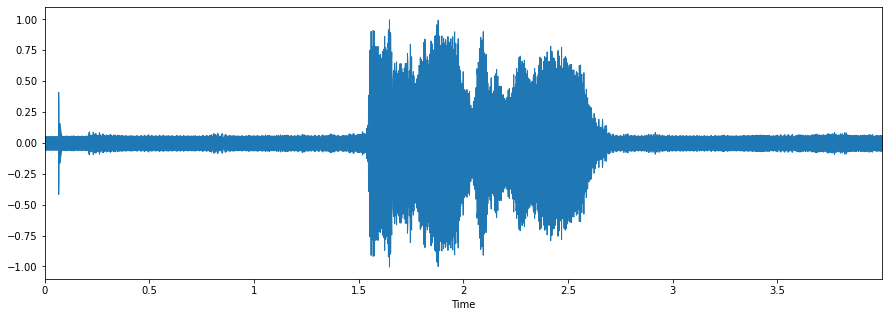

In [34]:
#The file 'output1.wav' in the previous cell is the file that was recorded live using the code :
data, sampling_rate = librosa.load('output1.wav')
%matplotlib inline
import os
import pandas as pd
import librosa.display
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [35]:
## Appying extract_feature function on random file and then loading model to predict the result 
file1 = os.path.basename('output1.wav')
file_name = os.path.basename(file1)
signal , rate = librosa.load(file1, sr=16000)
mask = envelope(signal,rate, 0.0005)
wavfile.write(filename= r'D:\Documents\ml\Speech_Emotion_Detection\Speech_Emotion_Detection\\'+str(file_name), rate=rate,data=signal[mask])

new_feature = extract_feature(file1, mfcc=True, chroma=True, mel=True)

# data.shape

predicted = Voice_Emotion_Detection_Model.predict([new_feature])
print(predicted[0])


happy
